# Problem 1: Linear Regression

You are hired by a company named Gem Stones Co Ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of approximately 27,000 pieces of cubic zirconia (which is an inexpensive synthesized diamond alternative with similar qualities of a diamond).

Your objective is to accurately predict prices of the zircon pieces. Since the company profits at a different rate at different price levels, for revenue management, it is important that prices are predicted as accurately as possible. At the same time, it is important to understand which of the predictors are more important in determining the price.

**Data Dictionary:**


**Carat** - 	 Carat weight of the cubic zirconia.

**Cut** -	     Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

**Colour** - 	 Colour of the cubic zirconia.With D being the best and J the worst.

**Clarity**-    Clarity refers to the absence of the Inclusions and Blemishes. (In order from Best to Worst in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1

**Depth** -	 The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.

**Table** -	 The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.

**Price** -	 the Price of the cubic zirconia.

**X** -	 Length of the cubic zirconia in mm.

**Y** -	 Width of the cubic zirconia in mm.

**Z**- 	 Height of the cubic zirconia in mm.

### Import Libraries

In [1]:
import numpy as np                 # for Numerical Calculation                                            
import pandas as pd                # for Dataframe Manupulation                                          
import seaborn as sns; sns.set()   # for Visualisation

import scipy as stats              # statistical calculations
import warnings
warnings.filterwarnings('ignore')

In [2]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
import sys


In [3]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [4]:
from termcolor import colored

## Q 1. The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. Since this is a regression problem, the dependence of the response on the predictors needs to be thoroughly investigated.

### Import Data set


In [5]:
df = pd.read_csv('cubic_zirconia.csv')

### Exploratory Data Analysis (EDA)

In [6]:
df.head() # Top 5 data

Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   
1           2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   
2           3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   
3           4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   
4           5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   

   price  
0    499  
1    984  
2   6289  
3   1082  
4    779

In [7]:
df.tail() # Last 5 data

Unnamed: 0  carat        cut color clarity  depth  table     x     y  \
26962       26963   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52   
26963       26964   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42   
26964       26965   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15   
26965       26966   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20   
26966       26967   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88   

          z  price  
26962  4.09   5408  
26963  2.74   1114  
26964  3.17   1656  
26965  2.60    682  
26966  4.27   5166

In [8]:
df.shape # Cheaking Dimensions

(26967, 11)

In [9]:
df.describe().T.style.background_gradient(cmap = "coolwarm")

In [10]:
df.describe(include = 'all').T

count unique    top   freq         mean          std    min  \
Unnamed: 0  26967.0    NaN    NaN    NaN      13484.0  7784.846691    1.0   
carat       26967.0    NaN    NaN    NaN     0.798375     0.477745    0.2   
cut           26967      5  Ideal  10816          NaN          NaN    NaN   
color         26967      7      G   5661          NaN          NaN    NaN   
clarity       26967      8    SI1   6571          NaN          NaN    NaN   
depth       26270.0    NaN    NaN    NaN    61.745147      1.41286   50.8   
table       26967.0    NaN    NaN    NaN     57.45608     2.232068   49.0   
x           26967.0    NaN    NaN    NaN     5.729854     1.128516    0.0   
y           26967.0    NaN    NaN    NaN     5.733569     1.166058    0.0   
z           26967.0    NaN    NaN    NaN     3.538057     0.720624    0.0   
price       26967.0    NaN    NaN    NaN  3939.518115  4024.864666  326.0   

               25%      50%      75%      max  
Unnamed: 0  6742.5  13484.0  20225.5  26967.0  
carat          0.4      0.7     1.05      4.5  
cut            NaN      NaN      NaN      NaN  
color          NaN      NaN      NaN      NaN  
clarity        NaN      NaN      NaN      NaN  
depth         61.0     61.8     62.5     73.6  
table         56.0     57.0     59.0     79.0  
x             4.71     5.69     6.55    10.23  
y             4.71     5.71     6.54     58.9  
z              2.9     3.52     4.04     31.8  
price        945.0   2375.0   5360.0  18818.0

**Observation**:

1. The column 'Price' is target variable and others are predictor variables

2. From the data sample, the column 'Unnamed:0' is not relevant for analysis

3. All the columns except depth contains 26,967 rows of data but depth column has 26,270 rows of data

4. x, y, z columns having values '0'

5. In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable.

In [11]:
df.describe(include=['object'])

cut  color clarity
count   26967  26967   26967
unique      5      7       8
top     Ideal      G     SI1
freq    10816   5661    6571

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


**Observation**:

1. Depth has missing values

2. Total 3 columns i.e. "cut"," color", "clarity" are of object type.

In [13]:
df1 = df.drop('Unnamed: 0', axis = 1) # droping of Unnamed: 0 Colonm
df1.head()

carat        cut color clarity  depth  table     x     y     z  price
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66    499
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70    984
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   6289
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   1082
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65    779

### Checking for values which are equal to zero

In [14]:
df1[df1.isin([0])].stack(0)

5821   x    0.0
       y    0.0
       z    0.0
6034   z    0.0
6215   x    0.0
       y    0.0
       z    0.0
10827  z    0.0
12498  z    0.0
12689  z    0.0
17506  x    0.0
       y    0.0
       z    0.0
18194  z    0.0
23758  z    0.0
dtype: object

In [15]:
print("Number of rows with x == 0: {} ".format((df1.x==0).sum()))
print("Number of rows with y == 0: {} ".format((df1.y==0).sum()))
print("Number of rows with z == 0: {} ".format((df1.z==0).sum()))
print("Number of rows with depth == 0: {} ".format((df1.depth==0).sum()))

Number of rows with x == 0: 3 
Number of rows with y == 0: 3 
Number of rows with z == 0: 9 
Number of rows with depth == 0: 0 


In [16]:
df1.shape

(26967, 10)

variables x, y and z have values which are equal to zero.



We have certain rows having values zero, the x, y, z are the dimensions of a diamond so this can’t take into model. As there are very less rows.

We can drop these rows as don’t have any meaning in model building.

### Dropping rows having values zero

In [17]:
df1 = df1.drop(df1[df1["x"]==0].index)
df1 = df1.drop(df1[df1["y"]==0].index)
df1 = df1.drop(df1[df1["z"]==0].index)
df1.shape

(26958, 10)

* Successfuly dropped the rows having values zero as don't have any meaning in model building.

* On the given data set the the mean and median values does not have much difference. .We can observe Min value of "x", "y", & "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we need to filter out those as it clearly faulty data entries. .There are three object data type 'cut', 'color' and 'clarity'.

### Data Cleaning 

### Step-1: Checking for duplicate records in the data.

In [18]:
duplicates = df1.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 33


In [19]:
print('Before',df1.shape)
df1.drop_duplicates(inplace = True)
print('After',df1.shape)

Before (26958, 10)
After (26925, 10)


In [20]:
duplicates = df1.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 0


### Step 2: Checking Missing value.

In [21]:
df1.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

### Imputing missing values

In [22]:
for column in df1.columns:
    if df1[column].dtype == 'float64':
        median = df1[column].median()
        df1[column] = df1[column].fillna(median)

df1.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [23]:
df1.describe().T.style.background_gradient(cmap = "coolwarm")

In [24]:
df1.shape

(26925, 10)

### Step 3 : Outlier Checks.

In [25]:
#creating DataFrame of continuous variables only
num_df = df1[['carat','depth','table','x','y','z','price']]

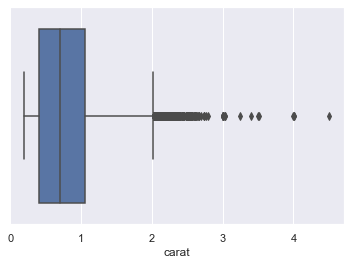

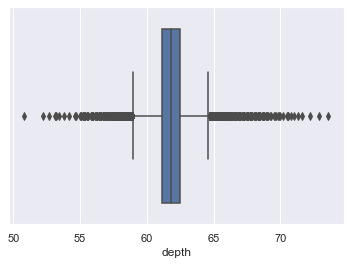

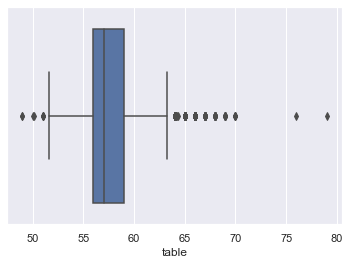

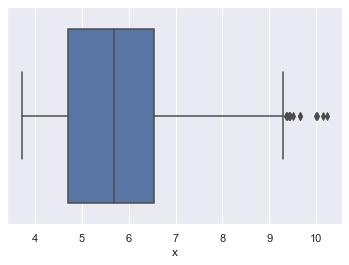

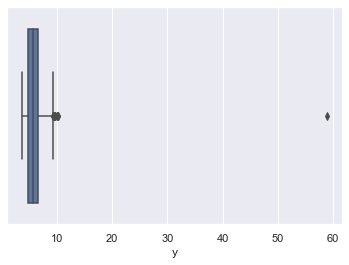

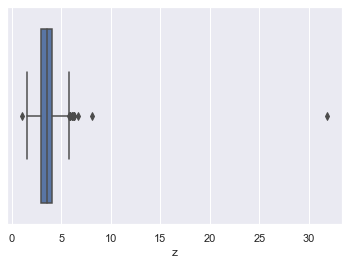

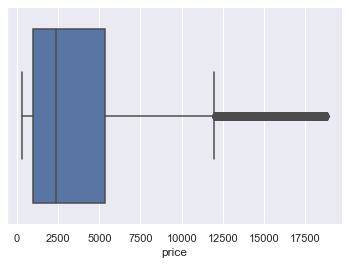

In [26]:
for i in num_df:
    sns.boxplot(num_df[i])
    plt.show()


### Removing Outliers 

In [27]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [28]:
lr,ur=remove_outlier(df1['carat'])
print("carat :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['carat']=np.where(df1['carat']>ur,ur,df1['carat'])
df1['carat']=np.where(df1['carat']<lr,lr,df1['carat'])
print('')

lr,ur=remove_outlier(df1['depth'])
print("depth :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['depth']=np.where(df1['depth']>ur,ur,df1['depth'])
df1['depth']=np.where(df1['depth']<lr,lr,df1['depth'])
print('')

lr,ur=remove_outlier(df1['table'])
print("table :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['table']=np.where(df1['table']>ur,ur,df1['table'])
df1['table']=np.where(df1['table']<lr,lr,df1['table'])
print('')

lr,ur=remove_outlier(df1['x'])
print("x :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['x']=np.where(df1['x']>ur,ur,df1['x'])
df1['x']=np.where(df1['x']<lr,lr,df1['x'])
print('')

lr,ur=remove_outlier(df1['y'])
print("y :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['y']=np.where(df1['y']>ur,ur,df1['y'])
df1['y']=np.where(df1['y']<lr,lr,df1['y'])
print('')

lr,ur=remove_outlier(df1['z'])
print("z :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['z']=np.where(df1['z']>ur,ur,df1['z'])
df1['z']=np.where(df1['z']<lr,lr,df1['z'])
print('')

lr,ur=remove_outlier(df1['price'])
print("price :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df1['price']=np.where(df1['price']>ur,ur,df1['price'])
df1['price']=np.where(df1['price']<lr,lr,df1['price'])
print('')

carat :
Lower Range : -0.5750000000000001 
Upper Range : 2.0250000000000004

depth :
Lower Range : 59.0 
Upper Range : 64.6

table :
Lower Range : 51.5 
Upper Range : 63.5

x :
Lower Range : 1.9500000000000002 
Upper Range : 9.309999999999999

y :
Lower Range : 1.9649999999999999 
Upper Range : 9.285

z :
Lower Range : 1.1899999999999997 
Upper Range : 5.75

price :
Lower Range : -5667.0 
Upper Range : 11965.0



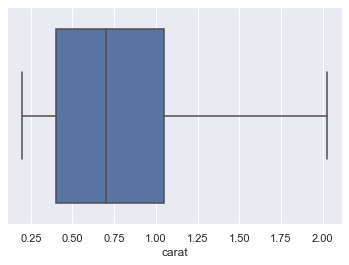

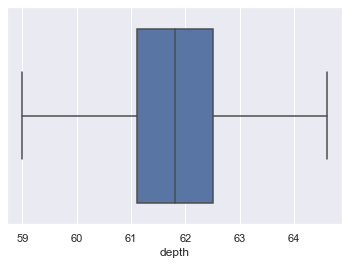

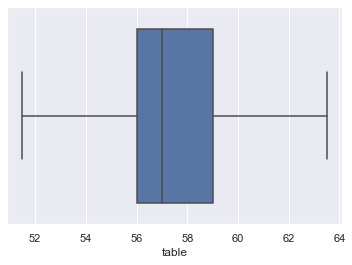

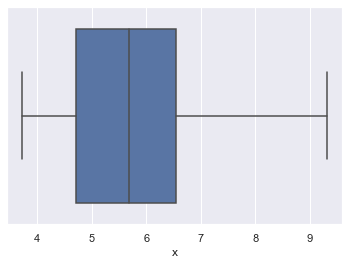

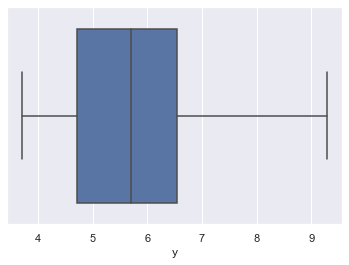

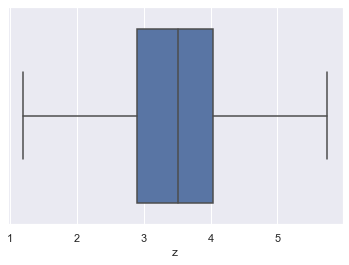

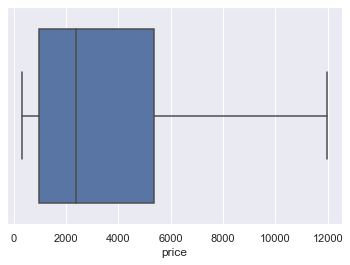

In [29]:
cont_cols = ['carat','depth','table','x','y','z','price']
for i in cont_cols:
    sns.boxplot(df1[i],whis=1.5)
    plt.show();

As we can see the ouliers are successfuly removed

In [30]:
df1.skew()

carat    0.917214
depth   -0.194474
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

### Step 4 - Univariate analysis, Bivariate Analysis and Multivariate Analysis

### Numerical Variables:

In [31]:
num_df.head()

carat  depth  table     x     y     z  price
0   0.30   62.1   58.0  4.27  4.29  2.66    499
1   0.33   60.8   58.0  4.42  4.46  2.70    984
2   0.90   62.2   60.0  6.04  6.12  3.78   6289
3   0.42   61.6   56.0  4.82  4.80  2.96   1082
4   0.31   60.4   59.0  4.35  4.43  2.65    779

In [32]:
def univaritateananlysis(column,nbins):
    print('Description of ' + column)
    print('...............................................................')
    print(num_df[column].describe(),end=' ')
    print(' ')
    
    plt.figure()
    print('Description of ' + column)
    print('...............................................................')
    sns.distplot(num_df[column]);
    plt.show()
    
    plt.figure()
    print('Boxplot of ' + column)
    print('...............................................................')
    sns.boxplot(x= num_df[column]);
    plt.show()

In [33]:
list_num_columns = list(num_df.columns.values)

Description of carat
...............................................................
count    26925.000000
mean         0.797821
std          0.477085
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64  
Description of carat
...............................................................


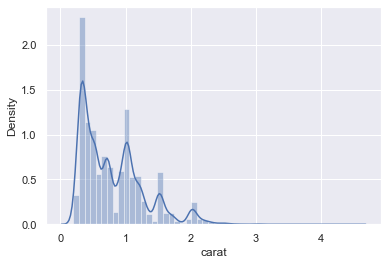

Boxplot of carat
...............................................................


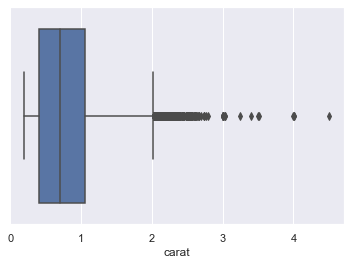

Description of depth
...............................................................
count    26925.000000
mean        61.746982
std          1.393457
min         50.800000
25%         61.100000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64  
Description of depth
...............................................................


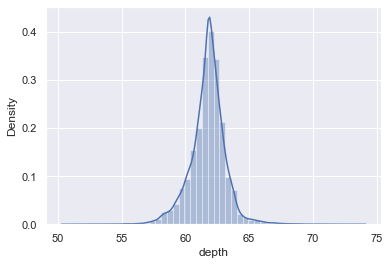

Boxplot of depth
...............................................................


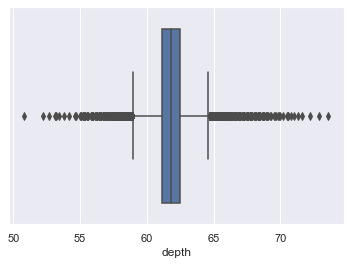

Description of table
...............................................................
count    26925.000000
mean        57.455305
std          2.231327
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64  
Description of table
...............................................................


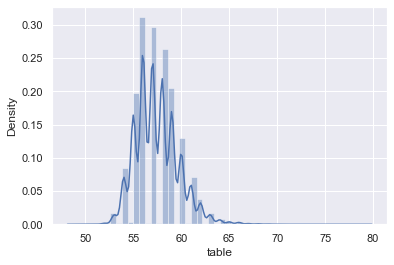

Boxplot of table
...............................................................


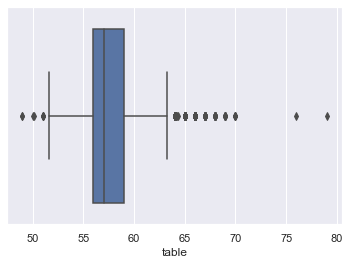

Description of x
...............................................................
count    26925.000000
mean         5.729385
std          1.126081
min          3.730000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64  
Description of x
...............................................................


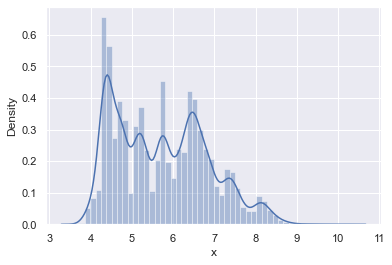

Boxplot of x
...............................................................


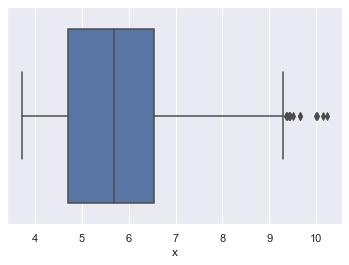

Description of y
...............................................................
count    26925.000000
mean         5.733152
std          1.163820
min          3.710000
25%          4.710000
50%          5.700000
75%          6.540000
max         58.900000
Name: y, dtype: float64  
Description of y
...............................................................


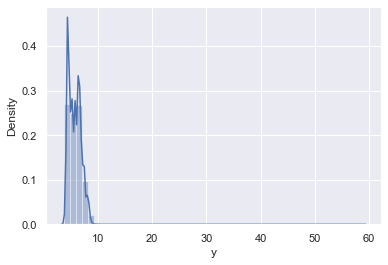

Boxplot of y
...............................................................


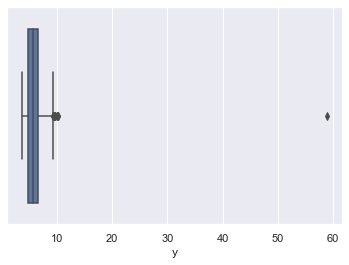

Description of z
...............................................................
count    26925.000000
mean         3.538820
std          0.717483
min          1.070000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64  
Description of z
...............................................................


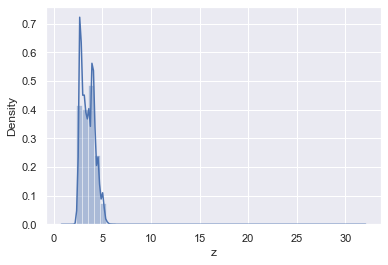

Boxplot of z
...............................................................


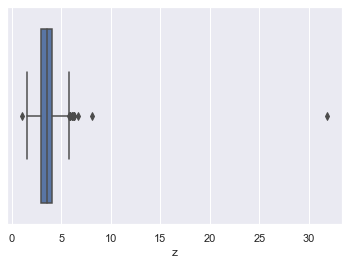

Description of price
...............................................................
count    26925.000000
mean      3936.249991
std       4020.983187
min        326.000000
25%        945.000000
50%       2373.000000
75%       5353.000000
max      18818.000000
Name: price, dtype: float64  
Description of price
...............................................................


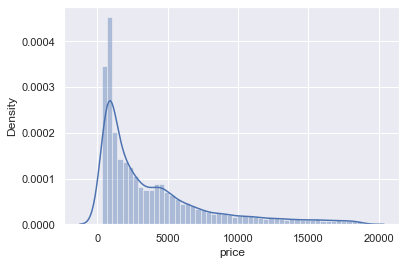

Boxplot of price
...............................................................


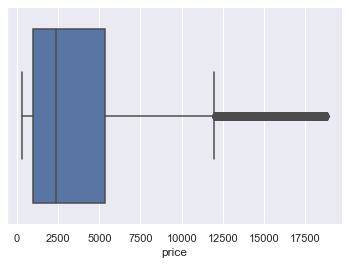

In [34]:
for x in list_num_columns:
    univaritateananlysis(x,20)

**Observation:**

**Distribution of carat:**

The distribution of data in carat seems to positively skewed, as there are multiple peaks points in the distribution there could multimode and the box plot of carat seems to have large number of outliers. In the range of 0 to 1 where majority of data lies.

**Distribution of Depth:**

The distribution of depth seems to be normal distribution,

The depth ranges from 55 to 65.

The box plot of the depth distribution holds many outliers.

**Distribution of table:**

The distribution of table also seems to be positively skewed.

The box plot of table has outliers.

The data distribution where there is maximum distribution is between 55 to 65.

**Distribution of x:**

The distribution of x (Length of the cubic zirconia in mm.) is positively skewed.

The box plot of the data consists of many outliers.

The distribution rages from 4 to 8.

**Distribution of y:**

The distribution of Y (Width of the cubic zirconia in mm.) is positively skewed.

The box plot also consists of outliers.

The distribution too much positively skewed. The skewness may be due to the diamonds are always made in specific shape. There might not be too much sizes in the market.

**Distribution of z:**

The distribution of z (Height of the cubic zirconia in mm.) is positively skewed.

The box plot also consists of outliers.

The distribution too much positively skewed. The skewness may be due to the diamonds are always made in specific shape. There might not be too much sizes in the market.

**Distribution of Price:**

The price has seems to be positively skewed. The skew is positive.

The price has outliers in the data.

The price distribution is from rs 326 to 18818.

In [35]:
df1.skew() 

carat    0.917214
depth   -0.194474
table    0.480476
x        0.397696
y        0.394060
z        0.394819
price    1.157121
dtype: float64

### Univariate  and Bivariate Ananlysis Categorical Variables

### CUT :

<AxesSubplot:xlabel='cut', ylabel='count'>

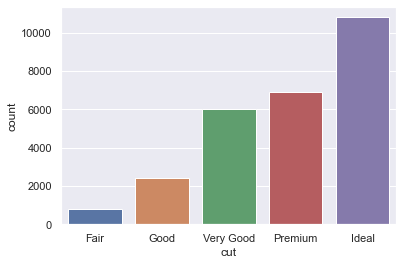

In [36]:
sns.countplot(df1['cut'],order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

The most preferred cut seems to be **ideal** cut for diamonds.

<AxesSubplot:xlabel='cut', ylabel='price'>

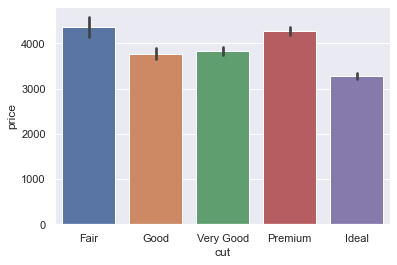

In [37]:
sns.barplot(data=df1,x='cut',y='price',order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])

The reason for the **most preferred cut Ideal** is because those diamonds are **priced lower than other cuts.**

### COLOR

<AxesSubplot:xlabel='color', ylabel='count'>

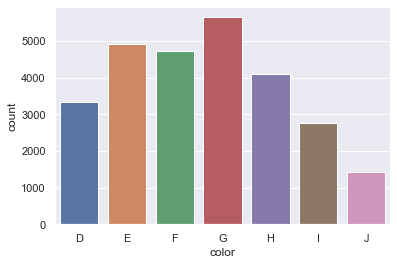

In [38]:
sns.countplot(df1['color'],order=['D', 'E', 'F', 'G','H', 'I', 'J'])

We have 7 colours in the data, The **G** seems to be the preferred colour.

<AxesSubplot:xlabel='color', ylabel='price'>

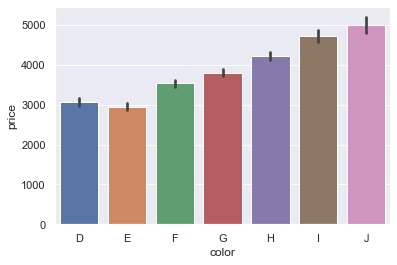

In [39]:
sns.barplot(data=df1,x='color',y='price',order=['D', 'E', 'F', 'G','H', 'I', 'J'])

We see the **G** is priced in the **middle** of the seven colours, whereas **J** being the **worst colour price seems too high.**

### CLARITY

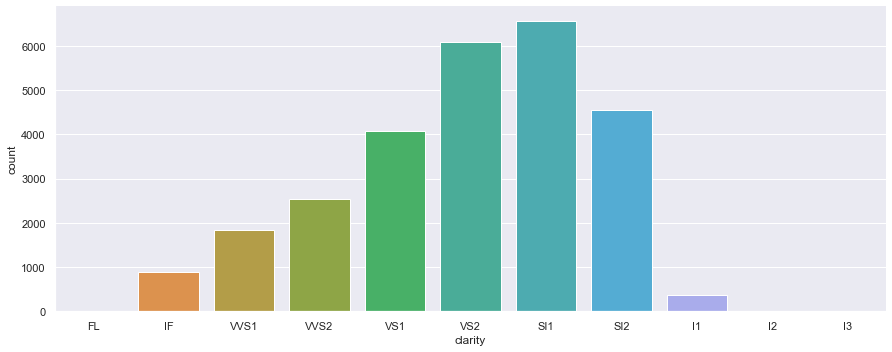

In [40]:
sns.catplot('clarity', data=df1, kind='count',aspect=2.5, order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

we can see here that SL1 has highest no. of diamonds

### Bivariate Analysis

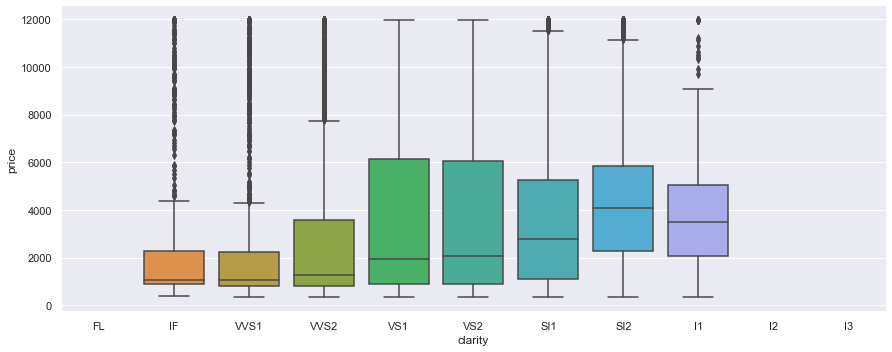

In [41]:
sns.catplot(x='clarity', y='price', data=df1, aspect =2.5, kind='box', order = ['FL', 'IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1', 'I2', 'I3'])

Observation on 'clarity': The Diamonds clarity with VS1 & VS2 are the most Expensive.

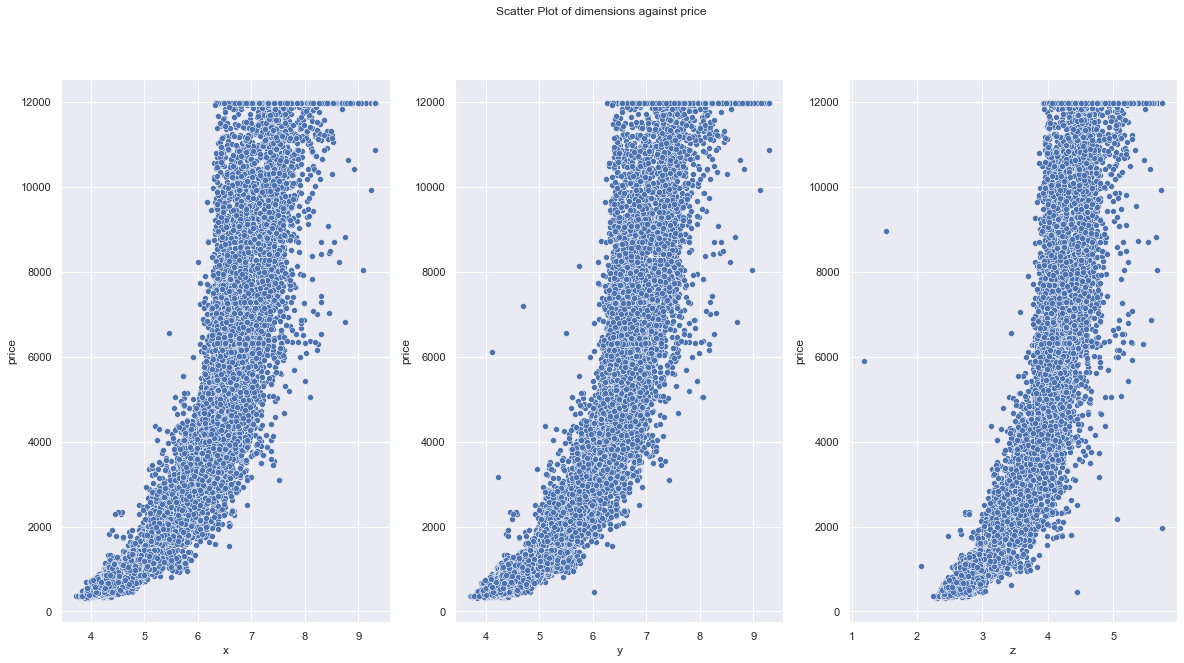

In [42]:
# Scatter plots of x, y, x against price

plt.figure(figsize = (20,10))
plt.subplot(131)
sns.scatterplot(data = df1, x = 'x', y= 'price')

plt.subplot(132)
sns.scatterplot(data = df1, x = 'y', y= 'price')

plt.subplot(133)
sns.scatterplot(data = df1, x = 'z', y= 'price')

plt.suptitle('Scatter Plot of dimensions against price')
plt.show()

We can see here as the prices increases according to the increase in size of x, y and z

### Multi-Variate Analysis¶

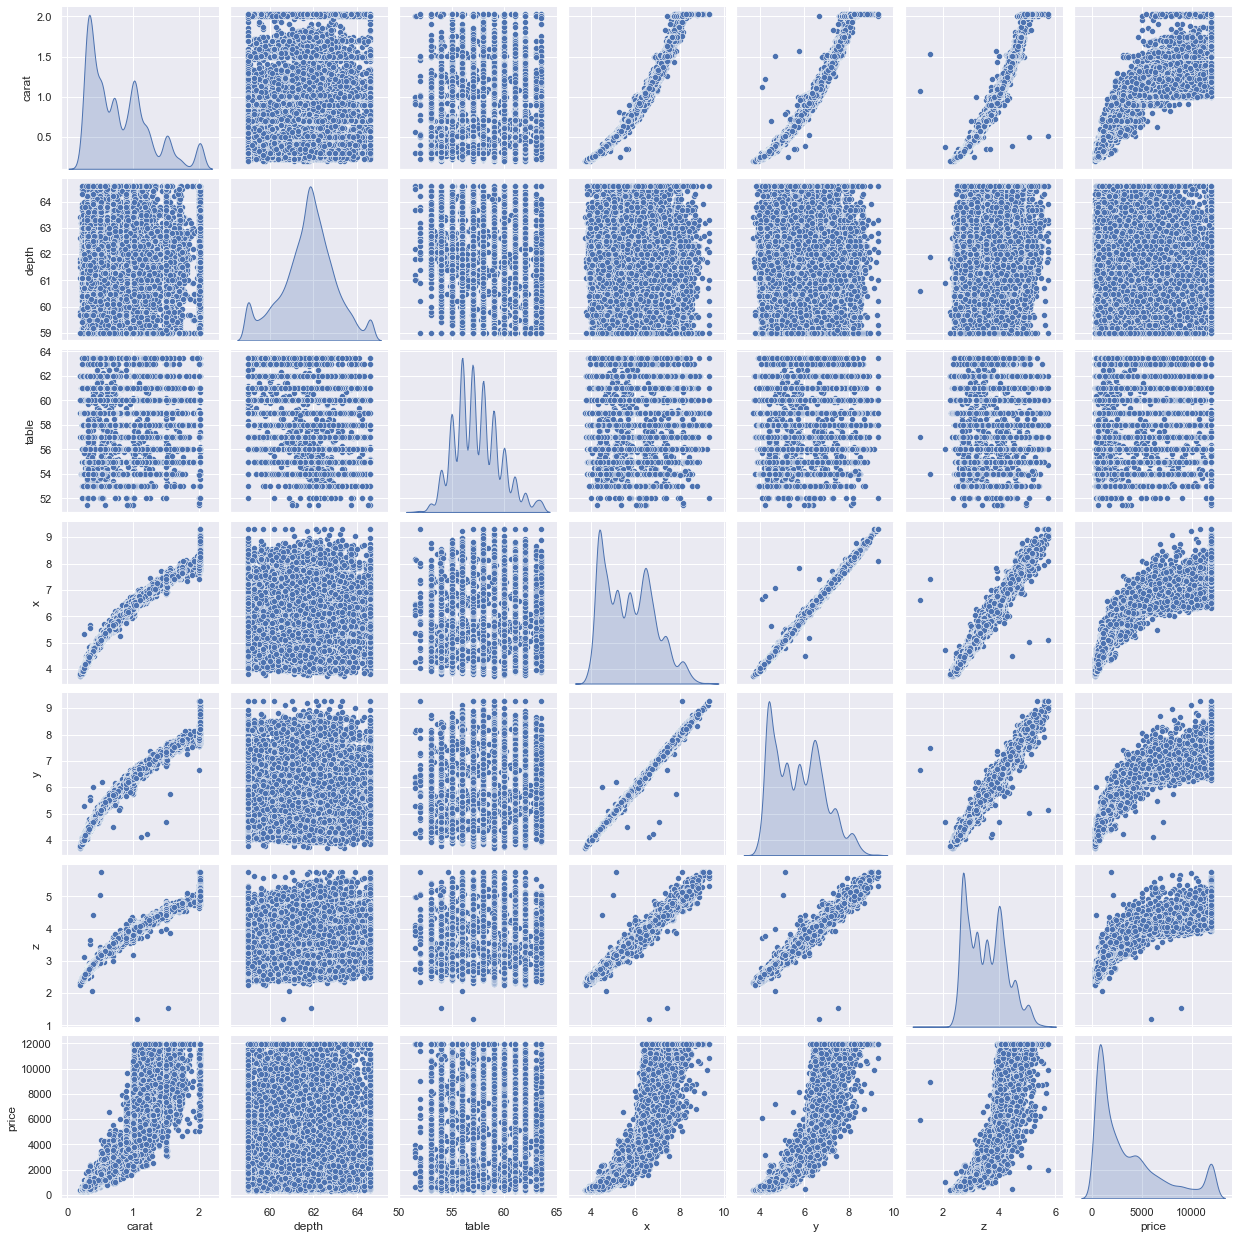

In [43]:
sns.pairplot(df1, diag_kind='kde')  
plt.show()

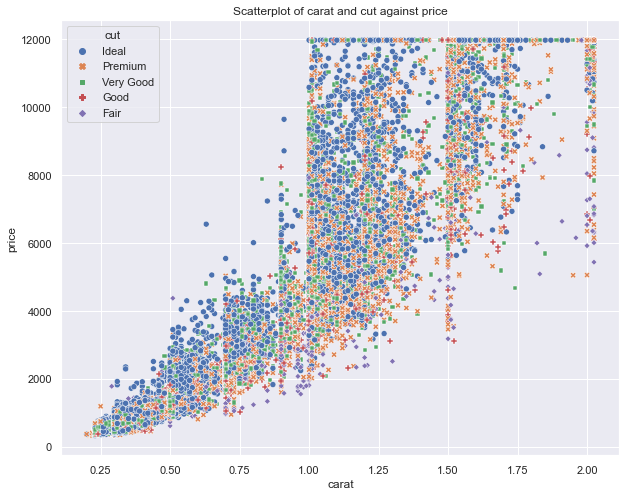

In [44]:
plt.figure(figsize = (10,8))
sns.scatterplot(data = df1,x = 'carat', y = 'price', hue = 'cut', style = 'cut')
plt.title('Scatterplot of carat and cut against price')
plt.show()

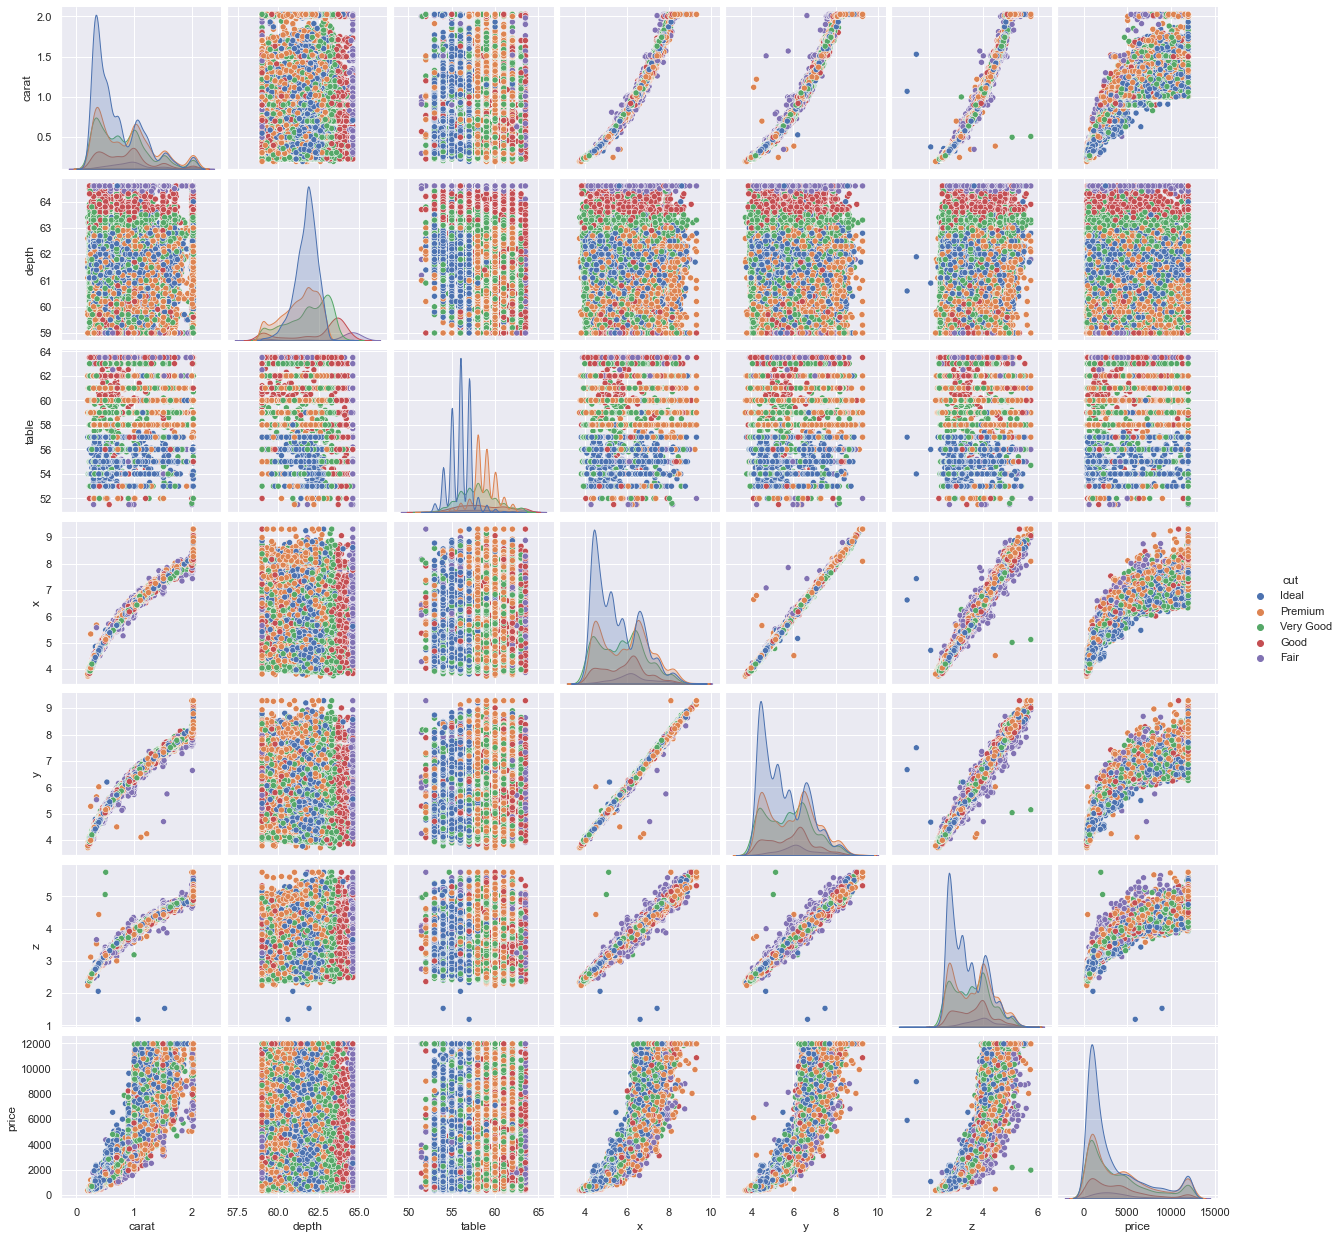

In [45]:
sns.pairplot(df1, hue = 'cut')
plt.show()

* Ideal cut gems are clustered at low priced region compared to high priced region

* x, y, z and price is a non-linear relation

* Price is highly corelated with carat, dimensions (x, y, z)

### Correlation Matrix

In [46]:
corr = df1.corr().T
corr

carat     depth     table         x         y         z     price
carat  1.000000  0.029735  0.187134  0.982880  0.981960  0.980882  0.936765
depth  0.029735  1.000000 -0.289163 -0.019676 -0.022720  0.094916 -0.000845
table  0.187134 -0.289163  1.000000  0.199653  0.194015  0.160519  0.137915
x      0.982880 -0.019676  0.199653  1.000000  0.998489  0.990898  0.913409
y      0.981960 -0.022720  0.194015  0.998489  1.000000  0.990533  0.914838
z      0.980882  0.094916  0.160519  0.990898  0.990533  1.000000  0.908599
price  0.936765 -0.000845  0.137915  0.913409  0.914838  0.908599  1.000000

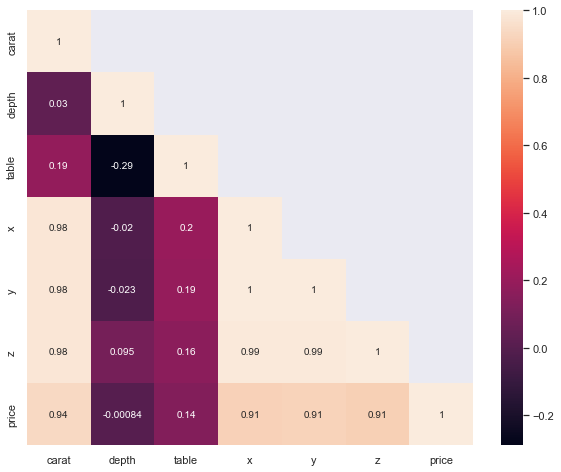

In [47]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,mask=np.triu(corr.corr(),+1));

**Observation :**

* This matrix clearly shows the presence of multi collinearity in the dataset.

* There is high corrleation between carat and x,y,z,price and price with x,y,z and z with x and y

In [48]:
## How each feature affects the price of diamonds.
corr["price"].sort_values(ascending=False)

price    1.000000
carat    0.936765
y        0.914838
x        0.913409
z        0.908599
table    0.137915
depth   -0.000845
Name: price, dtype: float64

It can be inferred that most features correlate with the price of Diamond. The notable exception is "depth" which has a negligible correlation (<1%).

## Exploratory Data analysis Summary

The inferences drawn from the above **Exploratory Data analysis:**

**Observation-1:**

(1).'Price' is the target variable while all others are the predictors. 

(2).The data set contains 26967 row, 11 column. 

(3).In the given data set there are 2 Integer type features,6 Float type features. 3 Object type features. Where 'price' is the target variable and all other are predector variable. 

(4)The first column is an index ("Unnamed: 0")as this only serial no, we can remove it.

**Observation-2:** 

(1).On the given data set the the mean and median values does not have much difference. 

(2).We can observe Min value of "x", "y", "z" are zero this indicates that they are faulty values. As we know dimensionless or 2-dimensional diamonds are not possible. So we have filter out those as it clearly faulty data entries. 

(3).There are three object data type 'cut', 'color' and 'clarity'.

**Observation-3:**

we can observe there are 697 missing value in the depth column. There are some duplicate row present. (33 duplicate rows out of 26958). which is nearly 0.12 % of the total data. So on this case we have dropped the duplicated row.

**Observation-4:** 

There are significant amount of outlier present in some variable,the features with datapoint that are far from the rest of dataset which will affect the outcome of our regression model. So we have treat the outliar. We can see that the distribution of some quantitative features like "carat" and the target feature "price" are heavily "right-skewed".

**Observation-5:**

It looks like most features do correlate with the price of Diamond. The notable exception is "depth" which has a negligble correlation (<1%). Observation on 'CUT': The Premium Cut on Diamonds are the most Expensive, followed by Very Good Cut.

### Do you think scaling is necessary in this case?


Scaling or Standardizing the features around the centre and 0 with a standard deviation of 1 is important when we compare measurements that have different units. Variables that are measured at different scales do not contribute equally to the analysis and might end up creating a bias.

For example, A variable that ranges between 0 and 1000 will outweigh a variable that ranges between 0 and 1. Using these variables without standardization will give the variable with the larger range weight of 1000 in the analysis. Transforming the data to comparable scales can prevent this problem.

In this data set we can see the all the variable are in different scale i.e price are in 1000s unit and depth and table are in 100s unit, and carat is in 10s. So its necessary to scale or standardise the data to allow each variable to be compared on a common scale. With data measured in different "units" or on different scales (as here with different means and variances) this is an important data processing step if the results are to be meaningful or not dominated by the variables that have large variances.

**But is scaling necessary in this case?**

No, it is not necessary, we'll get an equivalent solution whether we apply some kind of linear scaling or not. But recommended for regression techniques as well because it would help gradient descent to converge fast and reach the global minima. When number of features becomes large, it helps is running model quickly else the starting point would be very far from minima, if the scaling is not done in preprocessing.

For now we will process the model without scaling and later we will check the output with scaled data of regression model output.

### Finding the unique values for categorical variables

In [49]:
for column in df1.columns:
    if df1[column].dtypes == 'object':
        print (column.upper(), ':', df1[column].nunique())
        print (df1[column].value_counts().sort_values())
        print('\n')

CUT : 5
Fair           779
Good          2434
Very Good     6027
Premium       6880
Ideal        10805
Name: cut, dtype: int64


COLOR : 7
J    1440
I    2765
D    3341
H    4091
F    4722
E    4916
G    5650
Name: color, dtype: int64


CLARITY : 8
I1       362
IF       891
VVS1    1839
VVS2    2530
VS1     4086
SI2     4561
VS2     6092
SI1     6564
Name: clarity, dtype: int64




### Converting all objects to categorical codes

In [50]:
df1['cut'].value_counts() # BEFORE

Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64

In [51]:
## We are coding up the 'cut' variable in an ordinal manner
df1['cut']=np.where(df1['cut']=='Ideal','4',df1['cut'])
df1['cut']=np.where(df1['cut']=='Premium','3',df1['cut'])

df1['cut']=np.where(df1['cut']=='Good','2',df1['cut'])
df1['cut']=np.where(df1['cut']=='Very Good','1',df1['cut'])

df1['cut']=np.where(df1['cut']=='Fair','0',df1['cut'])

In [52]:
df1['cut'].value_counts() # AFTER

4    10805
3     6880
1     6027
2     2434
0      779
Name: cut, dtype: int64

In [53]:
df1['clarity'].value_counts() # BEFORE

SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64

In [54]:
## We are coding up the 'clarity' variable in an ordinal manner

df1['clarity']=np.where(df1['clarity']=='IF','7',df1['clarity'])

df1['clarity']=np.where(df1['clarity']=='VVS1','6',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='VVS2','5',df1['clarity'])

df1['clarity']=np.where(df1['clarity']=='VS1','4',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='VS2','3',df1['clarity'])


df1['clarity']=np.where(df1['clarity']=='SI1','2',df1['clarity'])
df1['clarity']=np.where(df1['clarity']=='SI2','1',df1['clarity'])

df1['clarity']=np.where(df1['clarity']=='I1','0',df1['clarity'])

In [55]:
df1['clarity'].value_counts() # AFTER

2    6564
3    6092
1    4561
4    4086
5    2530
6    1839
7     891
0     362
Name: clarity, dtype: int64

In [56]:
df1['color'].value_counts() # BEFORE

G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [57]:
## We are coding up the 'color' variable in an ordinal manner

df1['color']=np.where(df1['color']=='D','6',df1['color'])

df1['color']=np.where(df1['color']=='E','5',df1['color'])
df1['color']=np.where(df1['color']=='F','4',df1['color'])

df1['color']=np.where(df1['color']=='G','3',df1['color'])
df1['color']=np.where(df1['color']=='H','2',df1['color'])

df1['color']=np.where(df1['color']=='I','1',df1['color'])

df1['color']=np.where(df1['color']=='J','0',df1['color'])

In [58]:
df1['color'].value_counts() # AFTER

3    5650
5    4916
4    4722
2    4091
6    3341
1    2765
0    1440
Name: color, dtype: int64

In [59]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  object 
 2   color    26925 non-null  object 
 3   clarity  26925 non-null  object 
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  float64
dtypes: float64(7), object(3)
memory usage: 2.3+ MB


In [60]:
# Converting Object type into int64
df1['cut'] = df1['cut'].astype('float64')
df1['color'] = df1['color'].astype('float64')
df1['clarity'] = df1['clarity'].astype('float64')

In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26925 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26925 non-null  float64
 1   cut      26925 non-null  float64
 2   color    26925 non-null  float64
 3   clarity  26925 non-null  float64
 4   depth    26925 non-null  float64
 5   table    26925 non-null  float64
 6   x        26925 non-null  float64
 7   y        26925 non-null  float64
 8   z        26925 non-null  float64
 9   price    26925 non-null  float64
dtypes: float64(10)
memory usage: 2.3 MB


In [62]:
df1.head()

carat  cut  color  clarity  depth  table     x     y     z   price
0   0.30  4.0    5.0      2.0   62.1   58.0  4.27  4.29  2.66   499.0
1   0.33  3.0    3.0      7.0   60.8   58.0  4.42  4.46  2.70   984.0
2   0.90  1.0    5.0      5.0   62.2   60.0  6.04  6.12  3.78  6289.0
3   0.42  4.0    4.0      4.0   61.6   56.0  4.82  4.80  2.96  1082.0
4   0.31  4.0    4.0      6.0   60.4   59.0  4.35  4.43  2.65   779.0

## Q.2 Use the Pre-processed Full Data to develop a model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors?

### Check Correlation Matrix in form of HeatMap

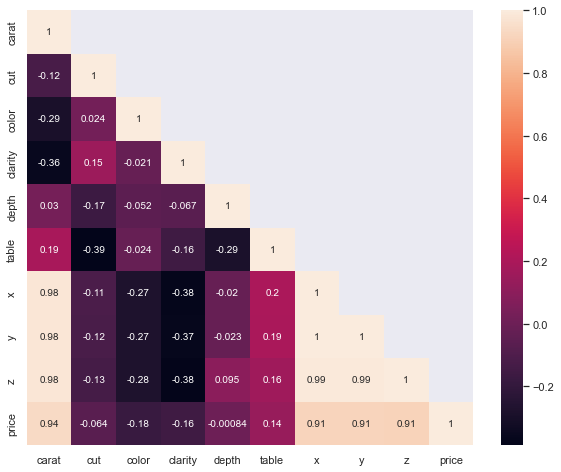

In [63]:
plt.figure(figsize=(10,8))
sns.heatmap(df1.corr(), annot=True,mask=np.triu(df1.corr(),+1))
plt.show()

### We will calculate the Variance Inflation Factor (VIF).

In [64]:
import statsmodels.formula.api as SM

In [65]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula = 'y~x',data = x_vars).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i],"VIF = ",vif)

In [66]:
df1.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

In [67]:
vif_cal(input_data=df1[['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']])

carat VIF =  331.19
cut VIF =  331.19
color VIF =  331.19
clarity VIF =  331.19
depth VIF =  331.19
table VIF =  331.19
x VIF =  331.19
y VIF =  331.19
z VIF =  331.19


##### We can consider a rule of thumb that if vif is greater than 5, we can choose to drop the variable as there can be a problem of multicollinearity. This essentially means that we can choose to drop a predictor variable whose 80% variation is being explained by the other predictor variables.

In [68]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
X_variables = df1.drop('price', axis=1)

In [70]:
vif = [variance_inflation_factor(X_variables.values, ix) for ix in range(X_variables.shape[1])]

In [71]:
i=0
for column in X_variables.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 122.72929963878924
cut ---> 7.246960772034961
color ---> 5.545479730513101
clarity ---> 5.426739259682176
depth ---> 1173.4714394827827
table ---> 841.1483504379042
x ---> 10845.48353444513
y ---> 9411.890074682238
z ---> 3180.4894711998472


We can observe there are very strong multi collinearity present in the data set. Ideally it should be within 1 to 5.

We are exploring the Linear Regression using statsmodels as we are interested in some more statistical metrics of the model.

### Linear Regression using statsmodels

### Model 1

In [72]:
formula_MLR_1 = 'price~carat+cut+color+clarity+depth+table+x+y+z'

In [73]:
model_MLR_1 = SM.ols(formula= formula_MLR_1,data = df1).fit()
model_MLR_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 4.037e+04
Date:                Wed, 26 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:23:08   Log-Likelihood:            -2.2167e+05
No. Observations:               26925   AIC:                         4.434e+05
Df Residuals:                   26915   BIC:                         4.434e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4005.9987    667.037     -6.006      0.000   -5313.426   -2698.571
carat       8840.4426     68.873    128.358      0.000    8705.448    8975.438
cut           68.9302      5.095     13.528      0.000      58.943      78.918
color        273.9660      3.442     79.598      0.000     267.220     280.712
clarity      437.5862      3.750    116.694      0.000     430.236     444.936
depth         28.9087      9.491      3.046      0.002      10.306      47.511
table        -24.0383      3.136     -7.665      0.000     -30.185     -17.891
x          -1190.6108    101.434    -11.738      0.000   -1389.427    -991.795
y           1520.8029     99.591     15.270      0.000    1325.599    1716.007
z          -1138.6637    122.273     -9.312      0.000   -1378.326    -899.002
==============================================================================
Omnibus:                     3675.822   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14831.316
Skew:                           0.636   Prob(JB):                         0.00
Kurtosis:                       6.406   Cond. No.                     1.03e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.03e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

${R^2}$ value and the Adjusted ${R^2}$ value says **Model 1 can easily explain 93% of the data**

For the $\underline{t-statistic}$ for every co-efficient of the Linear Regression the null and alternate Hypothesis is as follows:
#### ${H_0}$ : The variable is significant.
#### ${H_1}$:  The variable is not significant.


Lower the p-value for the t-statistic more significant are the variables.

Assuming null hypothesis is true, i.e there is no relationship between this variable with price. from that universe we have drawn the sample and on this sample we have found this co-efficient for the variable shown above.

Now we can ask what is the probability of finding this co-efficient in this drawn sample if in the real world the co-efficient is zero. As we see here the overall P value is less than alpha, so rejecting H0 and accepting Ha that atleast 1 regression co-efficient is not '0'. Here all regression co-efficients are not '0'.

 So we can say that the attribute which are having p value greater than 0.05 are poor predictor for price.

### Let us check the Scatter Plot and displot of residuals

In [74]:
model_MLR_1_pred = model_MLR_1.fittedvalues
model_MLR_1_pred

0         -20.641885
1        1812.457335
2        5744.790918
3        1454.214275
4        1600.008631
            ...     
26962    5506.108155
26963    1581.144958
26964    1908.096433
26965     612.247190
26966    5910.451848
Length: 26925, dtype: float64

Text(0, 0.5, 'Predicted Price')

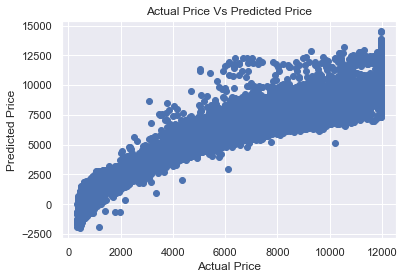

In [75]:
plt.scatter(df1['price'],model_MLR_1_pred)
plt.title('Actual Price Vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')


Text(0.5, 1.0, 'Actual Price Vs Predicted Price')

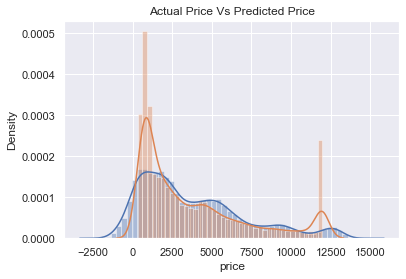

In [76]:
sns.distplot(model_MLR_1_pred)
sns.distplot(df1['price'])
plt.title('Actual Price Vs Predicted Price')

Text(0, 0.5, 'Predicted Price')

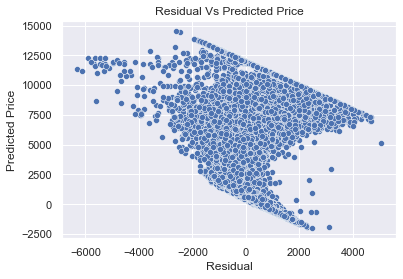

In [77]:
# Linear Relationship between Dependent and Independent Variables

sns.scatterplot(model_MLR_1.resid,model_MLR_1_pred)
plt.title('Residual Vs Predicted Price')
plt.xlabel('Residual')
plt.ylabel('Predicted Price')

### Calculate Mean Squared Error -  MSE

In [78]:
mse = np.mean((model_MLR_1.predict(df1.drop('price',axis=1))-df1['price'])**2)
mse

828690.7545368613

### Root Mean Squared Error - RMSE

In [79]:
np.sqrt(mse)

910.3245325359859

### Best Parameters

In [80]:
model_MLR_1.params

Intercept   -4005.998683
carat        8840.442626
cut            68.930222
color         273.966039
clarity       437.586239
depth          28.908675
table         -24.038261
x           -1190.610819
y            1520.802939
z           -1138.663749
dtype: float64

In [81]:
for i,j in np.array(model_MLR_1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(-4006.0) * Intercept + (8840.44) * carat + (68.93) * cut + (273.97) * color + (437.59) * clarity + (28.91) * depth + (-24.04) * table + (-1190.61) * x + (1520.8) * y + (-1138.66) * z + 

### The final Linear Regression equation is:




price = b0 + b1 *carat + b2 * cut + b3 * color + b4 * clarity+ b5 * depth + b6 * table + b7 * x + b8 * y + b9 *z


1) When **carat** increases by 1 unit, diamond price increases by 8840.442626 units, keeping all other predictors constant.

2) When **cut** increases by 1 unit, diamond price increases by 68.930222 units, keeping all other predictors constant.

3) When **color** increases by 1 unit, diamond price increases by 273.966039 units, keeping all other predictors constant.

4) When **clarity** increases by 1 unit, diamond price increases by 437.586239 units, keeping all other predictors constant.

5) When **y** increases by 1 unit, diamond price increases by 1520.802939 units, keeping all other predictors constant.

6) When **depth** increases by 1 unit, diamond price increases by 28.908675 units, keeping all other predictors constant.


**Below are the Six attributes that are most important attributes for predicting the price:**

(1) 'Carat',

(2) 'Cut', 

(3) 'color',

(4) 'clarity',

(5) depth,

(6) width i.e 'y'.

There are also some negative co-efficient values, for instance, corresponding co-efficient (-1190.610819) for 'x',(-1138.663749) for z and (-24.038261) for table This implies, these are inversely proportional with diamond price.

### Conclusion

* On the given data set we can see the 'X' i.e Length of the cubic zirconia in mm. having negative co-efficient i.e. -1190.610819. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.

* Similarly for the 'z' variable having negative co-efficient i.e  -1138.663749. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

* Also we can see the 'y' width in mm having positive co-efficient i.e 1520.802939 . And the p value is less than 0.05, so we can conclude that higher the width of the stone is a higher profitable stones.

* Finally we can conclude that best 6 attributes that are most important are **'Carat', 'Cut', 'color','clarity',depth and width i.e 'y'** for predicting the price.

## Q.3 Alternatively, if prediction accuracy of the price is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (2) to compare accuracy in training and test sets. Compare the final model of Part (2) and the proposed one in Part (3). Which model provides the most accurate prediction? If the model found in Part (2) is different from the proposed model in Part (3), give an explanation.

### Train-Test Split:

In [82]:
X = df1.drop('price', axis=1) # # Copy all the predictor variables into X dataframe
y = df1[['price']] ## Copy target into the y dataframe.This is the dependent variable

X.head()

carat  cut  color  clarity  depth  table     x     y     z
0   0.30  4.0    5.0      2.0   62.1   58.0  4.27  4.29  2.66
1   0.33  3.0    3.0      7.0   60.8   58.0  4.42  4.46  2.70
2   0.90  1.0    5.0      5.0   62.2   60.0  6.04  6.12  3.78
3   0.42  4.0    4.0      4.0   61.6   56.0  4.82  4.80  2.96
4   0.31  4.0    4.0      6.0   60.4   59.0  4.35  4.43  2.65

In [83]:
from sklearn.model_selection import train_test_split

In [84]:

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [85]:
from sklearn.linear_model import LinearRegression

In [86]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [87]:
# Let us explore the coefficients for each of the independent attributes
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lr.coef_[0][idx]))

The coefficient for carat is 8910.226902696053
The coefficient for cut is 74.0661724839455
The coefficient for color is 273.06848774088866
The coefficient for clarity is 439.1103520124743
The coefficient for depth is 17.390942555597725
The coefficient for table is -25.941584193425747
The coefficient for x is -1408.720639183714
The coefficient for y is 1594.9332611533919
The coefficient for z is -942.1707088511994


**Observation:**

Y=mx +c (m= m1,m2,m3...m9) here 9 diferent co-efficients will learn aling with the intercept which is "c" from the model.

From the above coefficients for each of the independent attributes we can conclude:

* The one unit increase in carat increases price by 8910.226902696053.

* The one unit increase in cut increases price by 74.0661724839455.

* The one unit increase in color increases price by 273.06848774088866.

* The one unit increase in clarity increases price by 439.1103520124743.

* The one unit increase in y increases price by 1594.9332611533919.

* The one unit increase in depth increases price by 17.390942555597725,

* But The one unit increase in table decreases price by -25.941584193425747,

* The one unit increase in x decreases price by -1408.720639183714,

* The one unit increase in z decreases price by -942.1707088511994.

### Let us check the intercept for the model

In [88]:
intercept = lr.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -3128.1000410056035


**Observation:**

The intercept (often labelled the constant) is the expected mean value of Y when all X=0. If X never equals 0, then the intercept has no intrinsic meaning.

The intercept for our model is -3128.1000410056035. In preset case when the other predictor variable are zero i.e like carat,cut, color, clarity all are zero then the C=-3128. ( Y = m1X1 + m2X2+ ….. + mnXn + C + e) that means price is -3128. which is meaningless. We can do Z score or scaling the data and make it nearly zero.


### R square on training data

In [89]:
lr.score(X_train, y_train)

0.9308919278860922

###  R square on testing data

In [90]:
lr.score(X_test, y_test)

0.9312649702204575

**Observation:**

R-square is the percentage of the response variable variation that is explained by a linear model. Or:

R-square = Explained variation / Total variation

R-squared is always between 0 and 100%: 0% indicates that the model explains none of the variability of the response data around its mean.100% indicates that the model explains all the variability of the response data around its mean. In this regression model we can see the R-square value on Training and Test data respectively 0.9308919278860922 and 0.9312649702204575.

In [91]:
from sklearn.metrics import mean_squared_error
from sklearn import metrics

### RMSE on Training and Testing data

In [92]:
predicted_train=lr.fit(X_train, y_train).predict(X_train)
print ('Training data RSME',np.sqrt(metrics.mean_squared_error(y_train,predicted_train)))

predicted_test=lr.fit(X_train, y_train).predict(X_test)
print ('Testing data RSME',np.sqrt(metrics.mean_squared_error(y_test,predicted_test)))

Training data RSME 909.1175874626282
Testing data RSME 913.6992869600517


### Plot the predicted y value vs actual y values for the test data

Text(0, 0.5, 'y_pred')

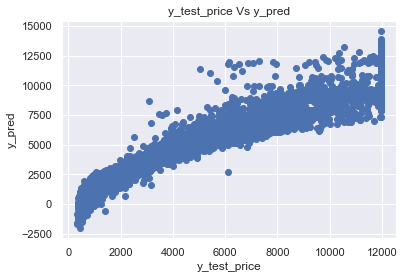

In [93]:
y_pred = lr.predict(X_test)
plt.scatter(y_test['price'], y_pred)

plt.title('y_test_price Vs y_pred')
plt.xlabel('y_test_price')
plt.ylabel('y_pred')

**Observation:**
    
we can see that the is a linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.

Linear regression Performance Metrics:

* intercept for the model: -3128.1000410056035

* R square on training data: 0.9308919278860922

* R square on testing data: 0.9312649702204575

* RMSE on Training data: 909.1175874626282

* RMSE on Testing data: 913.6992869600517

As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

### Applying zscore statsmodels

In [94]:
from scipy.stats import zscore

X_train_scaled  = X_train.apply(zscore)
X_test_scaled = X_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)

In [95]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train_scaled, y_train_scaled)

LinearRegression()

In [96]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.1848755295962892
The coefficient for cut is 0.027059658339948636
The coefficient for color is 0.13456521080175787
The coefficient for clarity is 0.20937050696453188
The coefficient for depth is 0.00613077231923572
The coefficient for table is -0.016176279595997163
The coefficient for x is -0.4567109739737822
The coefficient for y is 0.5135558015931092
The coefficient for z is -0.1887684644215627


In [97]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is -6.862327432518792e-16


In [98]:
# Model score - R2 or coeff of determinant
regression_model.score(X_test_scaled, y_test_scaled)

0.931226208782979

**Observation:**

Now we can observe by applying z score the intercept became -6.862327432518792e-16. Earlier it was -3128.1000410056035. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

### Summary

**Inference:**
    
we can see that the is a linear plot, very strong corelation between the predicted y and actual y. But there are lots of spread. That indicated some kind noise present on the data set i.e Unexplained variances on the output.

Linear regression Performance Metrics:

* intercept for the model: -3128.1000410056035

* R square on training data: 0.9308919278860922

* R square on testing data: 0.9312649702204575

* RMSE on Training data: 909.1175874626282

* RMSE on Testing data: 913.6992869600517

As the training data & testing data score are almost inline, we can conclude this model is a Right-Fit Model.

**Impact of scaling:**

Now we can observe by applying z score the intercept became -6.862327432518792e-16. Earlier it was -3128.1000410056035. the co-efficient has changed, the bias became nearly zero but the overall accuracy still same.

**Multi collinearity:**

We can observe there are very strong multi collinearity present in the data set.

**From statsmodels:**

we can see R-squared:0.931 and Adj. R-squared: 0.931 are same. The overall P value is less than alpha.


Below are the Six attributes that are most important attributes for predicting the price:

1) When **carat** increases by 1 unit, diamond price increases by 8840.442626 units, keeping all other predictors constant.

2) When **cut** increases by 1 unit, diamond price increases by 68.930222 units, keeping all other predictors constant.

3) When **color** increases by 1 unit, diamond price increases by 273.966039 units, keeping all other predictors constant.

4) When **clarity** increases by 1 unit, diamond price increases by 437.586239 units, keeping all other predictors constant.

5) When **y** increases by 1 unit, diamond price increases by 1520.802939 units, keeping all other predictors constant.

6) When **depth** increases by 1 unit, diamond price increases by 28.908675 units, keeping all other predictors constant.


Similarly, 

* On the given data set we can see the **'X' i.e Length** of the cubic zirconia in mm. having **negative co-efficient** i.e. -1190.610819. And the p value is less than 0.05, so can conclude that as higher the length of the stone is a lower profitable stones.

* Similarly for the **'z' variable having negative co-efficient** i.e  -1138.663749. And the p value is less than 0.05, so we can conclude that as higher the 'z' of the stone is a lower profitable stones.

* Also we can see the **'y' width in mm having positive co-efficient** i.e 1520.802939 . And the p value is less than 0.05, so we can conclude that higher the width of the stone is a higher profitable stones.

* Finally we can conclude that best 6 attributes that are most important are **'Carat', 'Cut', 'color','clarity',depth and width i.e 'y'** for predicting the price.



### Recommendations:

The Gem Stones company should consider the features'Carat', 'Cut', 'color','clarity' and width i.e 'y' as most important for predicting the price.

To distinguish between higher profitable stones and lower profitable stones so as to have better profit share.

As we can see from the model Higher the width('y') of the stone is higher the price.

So the stones having higher width('y') should consider in higher profitable stones.
The 'Premium Cut' on Diamonds are the most Expensive, followed by 'Very Good' Cut, these should consider in higher profitable stones.

The Diamonds clarity with 'VS1' &'VS2' are the most Expensive.So these two category also consider in higher profitable stones.

As we see for 'X' i.e Length of the stone, higher the length of the stone is lower the price.

So higher the Length('x') of the stone are lower is the profitability.
higher the 'z' i.e Height of the stone is, lower the price.This is because if a Diamond's Height is too large Diamond will become 'Dark' in appearance because it will no longer return an Attractive amount of light. That is why

Stones with higher 'z' is also are lower in profitability.

# Problem 2: Logistic Regression 

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

**Data Dictionary:**


**Holiday_Package** -  	 Opted for Holiday Package yes/no?

**Salary** - 	         Employee salary

**age** -  	             Age in years

**edu** -                Years of formal education

**no_young_children** -  The number of young children (younger than 7 years)

**no_older_children** -  Number of older children

**foreign** -            foreigner Yes/No
 

### Import Libraries

In [99]:
import numpy as np                 # for Numerical Calculation                                            
import pandas as pd                # for Dataframe Manupulation                                          
import seaborn as sns; sns.set()   # for Visualisation
import matplotlib.pyplot as plt    # for Visualisation
%matplotlib inline

import scipy as stats              # statistical calculations
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale

In [100]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import scipy.stats as st
import sys


In [101]:
from termcolor import colored

## Q.1 The very first step of any data analysis assignment is to do the exploratory data analysis (EDA). Once you have understood the nature of all the variables, especially identified the response and the predictors, apply appropriate methods to determine whether there is any duplicate observation or missing data and whether the variables have a symmetric or skewed distribution. Note that data may contain various types of attributes and numerical and/or visual data summarization techniques need to be appropriately decided. Both univariate and bivariate analyses and pre-processing of data are important. Check for outliers and comment on removing or keeping them while model building. For this is a classification problem, the dependence of the response on the predictors needs to be investigated.

### Import Data set


In [102]:
df_ho = pd.read_csv('Holiday_Package.csv')

### Exploratory Data Analysis (EDA)

In [103]:
df_ho.head() # Top 5 data

Unnamed: 0 Holliday_Package  Salary  age  educ  no_young_children  \
0           1               no   48412   30     8                  1   
1           2              yes   37207   45     8                  0   
2           3               no   58022   46     9                  0   
3           4               no   66503   31    11                  2   
4           5               no   66734   44    12                  0   

   no_older_children foreign  
0                  1      no  
1                  1      no  
2                  0      no  
3                  0      no  
4                  2      no

In [104]:
df_ho.tail() # Last 5 data

Unnamed: 0 Holliday_Package  Salary  age  educ  no_young_children  \
867         868               no   40030   24     4                  2   
868         869              yes   32137   48     8                  0   
869         870               no   25178   24     6                  2   
870         871              yes   55958   41    10                  0   
871         872               no   74659   51    10                  0   

     no_older_children foreign  
867                  1     yes  
868                  0     yes  
869                  0     yes  
870                  1     yes  
871                  0     yes

In [105]:
df_ho.shape # Cheaking Dimensions

(872, 8)

**Observation**:

The data have 872 rows and 8 columns



In [106]:
df_ho.skew() # Checking skweness

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

In [107]:
df_ho.describe().T.style.background_gradient(cmap = "coolwarm") ## Summary

**Observation :**

From summary, we can see that :-

* max salary(236K) is very high as compared to mean(47K) and median(42K). Hence it contains outlier

* Mean and median of age are approximately similar 39-40. It doesnt contains outlier.

* Education middle 50% of data lies in between 8 to 12 range with few outliers.

* Most employees have no of young children as 0.

* Most of the employees have 1 child who is older than 7 years

* All the columns are positively skewed except education

In [108]:
df_ho.describe(include = 'all').T # SUmmary inculding object variables

count unique  top freq          mean           std     min  \
Unnamed: 0         872.0    NaN  NaN  NaN         436.5    251.869014     1.0   
Holliday_Package     872      2   no  471           NaN           NaN     NaN   
Salary             872.0    NaN  NaN  NaN  47729.172018  23418.668531  1322.0   
age                872.0    NaN  NaN  NaN     39.955275     10.551675    20.0   
educ               872.0    NaN  NaN  NaN      9.307339      3.036259     1.0   
no_young_children  872.0    NaN  NaN  NaN      0.311927       0.61287     0.0   
no_older_children  872.0    NaN  NaN  NaN      0.982798      1.086786     0.0   
foreign              872      2   no  656           NaN           NaN     NaN   

                       25%      50%      75%       max  
Unnamed: 0          218.75    436.5   654.25     872.0  
Holliday_Package       NaN      NaN      NaN       NaN  
Salary             35324.0  41903.5  53469.5  236961.0  
age                   32.0     39.0     48.0      62.0  
educ                   8.0      9.0     12.0      21.0  
no_young_children      0.0      0.0      0.0       3.0  
no_older_children      0.0      1.0      2.0       6.0  
foreign                NaN      NaN      NaN       NaN

In [109]:
df_ho.describe(include=['object'])

Holliday_Package foreign
count               872     872
unique                2       2
top                  no      no
freq                471     656

In [110]:
df_ho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


**Observation**:


* The data set contains 872 observations of data and 7 features. Since non null count is same in every column variable there appears **no null data.**

* two object variables and six numaric variables.

* variable "Unnamed: 0" seems useless variable.

In [111]:
df_ho1= df_ho.drop(columns=['Unnamed: 0'],axis=1) # droping of Unnamed: 0 Colonm
df_ho1.head()

Holliday_Package  Salary  age  educ  no_young_children  no_older_children  \
0               no   48412   30     8                  1                  1   
1              yes   37207   45     8                  0                  1   
2               no   58022   46     9                  0                  0   
3               no   66503   31    11                  2                  0   
4               no   66734   44    12                  0                  2   

  foreign  
0      no  
1      no  
2      no  
3      no  
4      no

In [112]:
df_ho2= df_ho.drop(columns=['Unnamed: 0'],axis=1)

### Data Cleaning 

### Step-1: Checking for duplicate records in the data.

In [113]:
dups = df_ho1.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

df_ho1[dups]

Number of duplicate rows = 0


Empty DataFrame
Columns: [Holliday_Package, Salary, age, educ, no_young_children, no_older_children, foreign]
Index: []

**Observation**

No duplicated data is present.

### Step 2: Checking Missing value.

In [114]:
df_ho1.isnull().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

**Observation**

We can confirm that there are no NULL values in the data

### Step 3 : Outlier Checks.

In [115]:
# Creating DataFrame of Continuous variables
num_df_ho1= df_ho1[['Salary','age','educ','no_young_children','no_older_children']]
num_df_ho1.head()

Salary  age  educ  no_young_children  no_older_children
0   48412   30     8                  1                  1
1   37207   45     8                  0                  1
2   58022   46     9                  0                  0
3   66503   31    11                  2                  0
4   66734   44    12                  0                  2

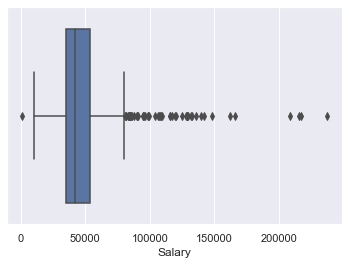

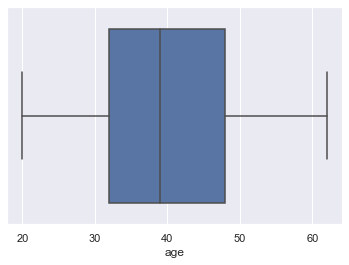

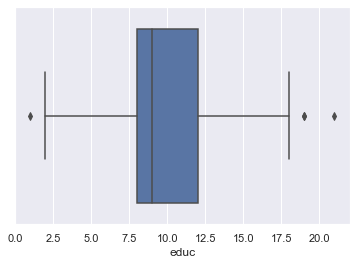

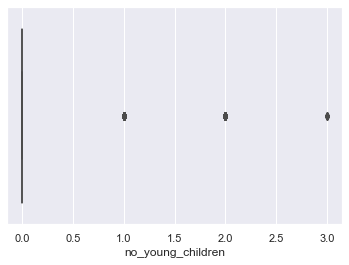

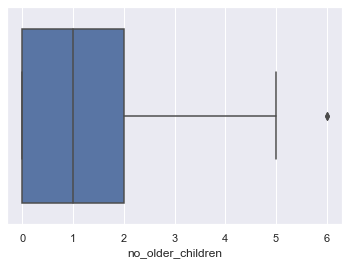

In [116]:
for i in num_df_ho1:
    sns.boxplot(num_df_ho1[i])
    plt.show()


**Observation**:

As evident from above box plot, there are many outliers in salary column.

education, no of young childern and old children columns have very few outliers which we can ignore

### Removing Outliers "Salary"

In [117]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [118]:
lr,ur=remove_outlier(df_ho1['Salary'])
print("Salary :")
print('Lower Range :',lr,'\nUpper Range :',ur)
df_ho1['Salary']=np.where(df_ho1['Salary']>ur,ur,df_ho1['Salary'])
df_ho1['Salary']=np.where(df_ho1['Salary']<lr,lr,df_ho1['Salary'])
print('')


Salary :
Lower Range : 8105.75 
Upper Range : 80687.75



<AxesSubplot:xlabel='Salary'>

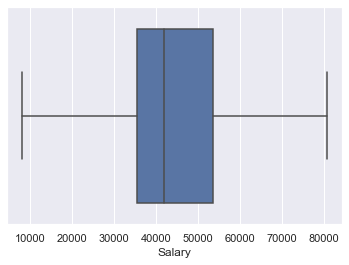

In [119]:
sns.boxplot(df_ho1['Salary'])

**Observation :**

We are only doing outlier treatment for Salary attribute as other columns have very less outliers and that are near lower and upper ranges

### Correcting Spelling error in Column names

In [120]:
df_ho1.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [121]:
df_ho1.rename(columns={'Holliday_Package':'HolidayPackage','age':'Age','educ':'Educ','no_young_children':'No_young_children','no_older_children':'No_older_children','foreign':'Foreign'},inplace=True)

In [122]:
df_ho1.columns

Index(['HolidayPackage', 'Salary', 'Age', 'Educ', 'No_young_children',
       'No_older_children', 'Foreign'],
      dtype='object')

### Step 4 - Univariate Analysis, Bivariate Analysis and Multivariate Analysis

### Univariate Analysis

### Numerical Variables:

In [123]:
num_df_ho1.head()

Salary  age  educ  no_young_children  no_older_children
0   48412   30     8                  1                  1
1   37207   45     8                  0                  1
2   58022   46     9                  0                  0
3   66503   31    11                  2                  0
4   66734   44    12                  0                  2

In [124]:
def univaritateananlysis(column,nbins):
    print('Description of ' + column)
    print('...............................................................')
    print(num_df_ho1[column].describe(),end=' ')
    print(' ')
    
    plt.figure()
    print('Description of ' + column)
    print('...............................................................')
    sns.distplot(num_df_ho1[column]);
    plt.show()
    
    plt.figure()
    print('Boxplot of ' + column)
    print('...............................................................')
    sns.boxplot(x= num_df_ho1[column]);
    plt.show()

In [125]:
list_num_columns = list(num_df_ho1.columns.values)

Description of Salary
...............................................................
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64  
Description of Salary
...............................................................


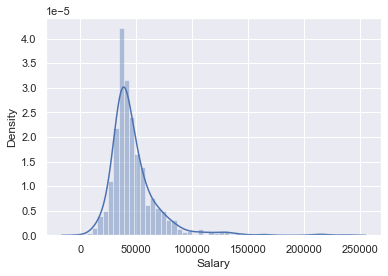

Boxplot of Salary
...............................................................


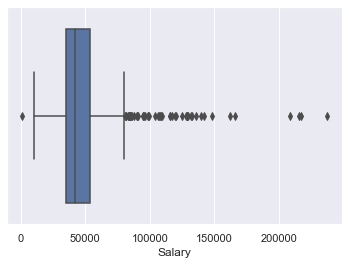

Description of age
...............................................................
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64  
Description of age
...............................................................


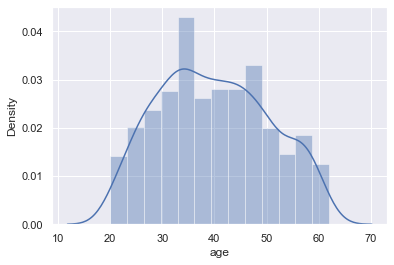

Boxplot of age
...............................................................


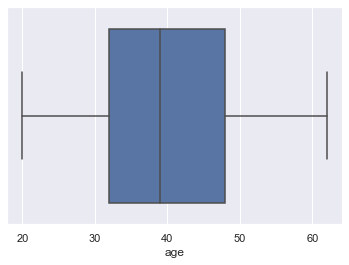

Description of educ
...............................................................
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64  
Description of educ
...............................................................


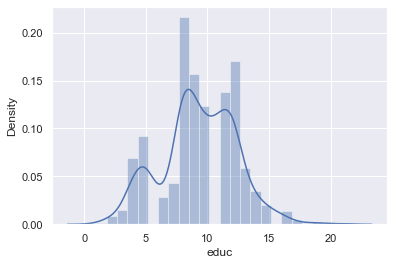

Boxplot of educ
...............................................................


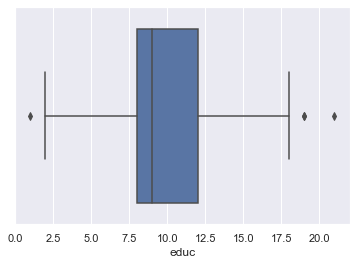

Description of no_young_children
...............................................................
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64  
Description of no_young_children
...............................................................


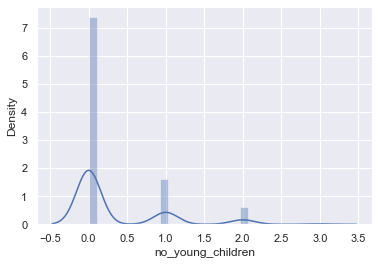

Boxplot of no_young_children
...............................................................


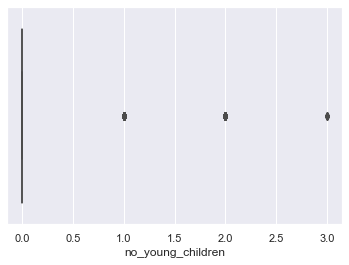

Description of no_older_children
...............................................................
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64  
Description of no_older_children
...............................................................


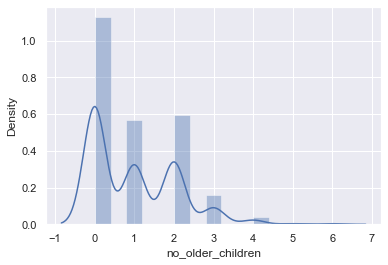

Boxplot of no_older_children
...............................................................


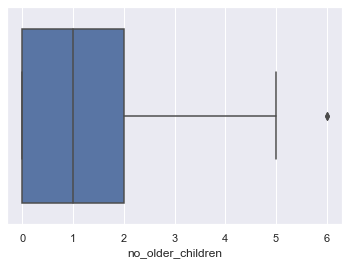

In [126]:
for x in list_num_columns:
    univaritateananlysis(x,20)

**Observation**

From Distplot and Boxplot we can see that:

* Salary range is 0-100000 for most of the employees. However few employees are getting more salary causing skewness

* Age appears to be normally distributed

* Around 650 employees out of 872 have their young children as 0.

* Around 380 out of 872 employees have no of older children as 0

* Education middle 50% of data lies in between 8 to 12 range with few outliers.



* As evident from above box plot, there are many outliers in salary column.

* education, no of young childern and old children columns have very few outliers.

### Categorical Variables

### Checking the unique values for categorical variables

In [127]:
for column in df_ho1.columns:
    if df_ho1[column].dtype == 'object':
        print(column,': ',df_ho1[column].nunique())
        print(df_ho1[column].value_counts().sort_values())
        print('\n')

HolidayPackage :  2
yes    401
no     471
Name: HolidayPackage, dtype: int64


Foreign :  2
yes    216
no     656
Name: Foreign, dtype: int64




### HolidayPackage

<AxesSubplot:xlabel='HolidayPackage', ylabel='count'>

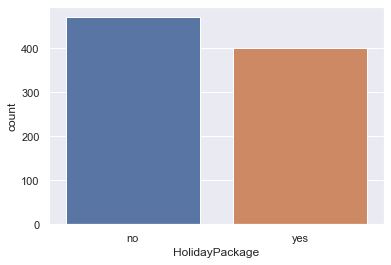

In [128]:
sns.countplot(x='HolidayPackage',data=df_ho1)

We can see count of Employee not using Holiday Packages are more

### Foreign

<AxesSubplot:xlabel='Foreign', ylabel='count'>

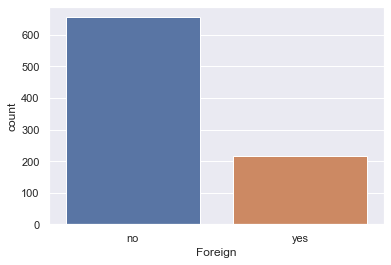

In [129]:
sns.countplot(x='Foreign',data=df_ho1)

We can see count of Forgein Employee not using Holiday Packages are more

### Bivariate Analysis 

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

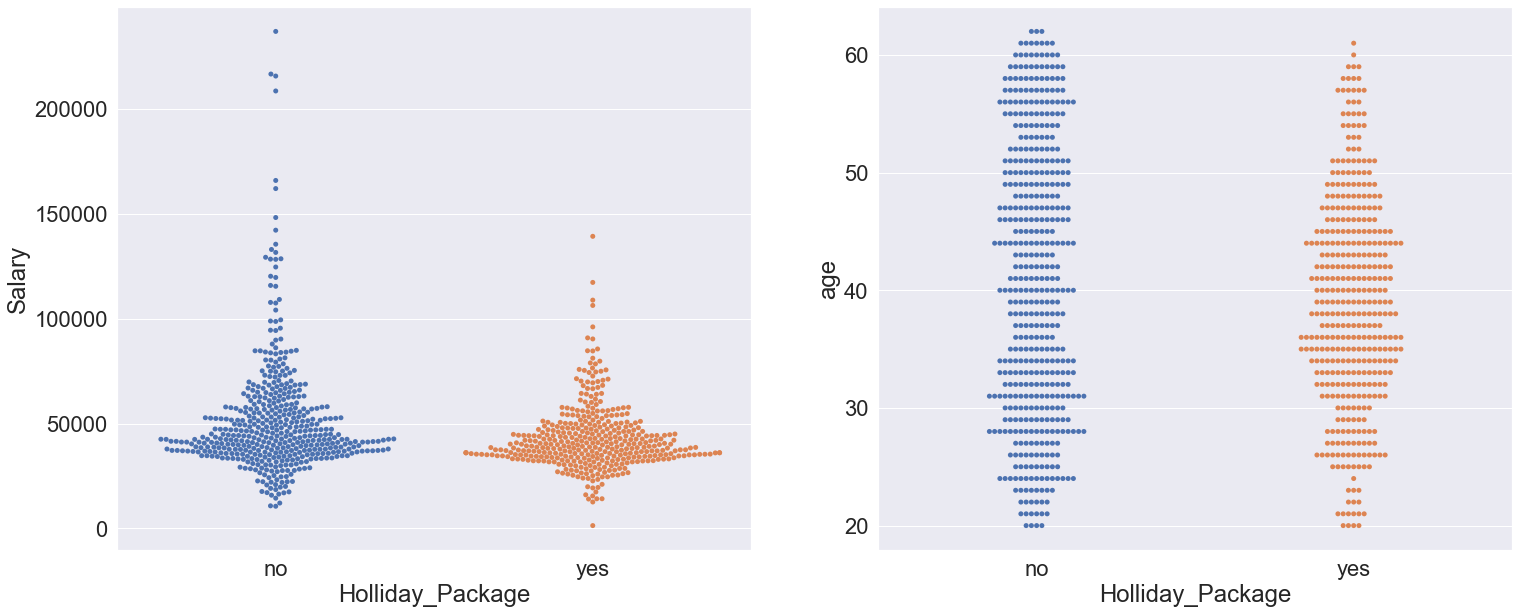

In [130]:
plt.figure(figsize=(25,10))
sns.set(font_scale=2)
plt.subplot(1,2,1)
sns.swarmplot(data=df_ho,x='Holliday_Package', y='Salary')
plt.subplot(1,2,2)
sns.swarmplot(data=df_ho,x='Holliday_Package', y='age')

**Observation**:
    
* As Salary increases to the max value, employees count increases for the not opting for the holiday package. As Age increases beyond 50 level, less emplyees opt for the holiday package

* We can see employees below salary 150000 have always opted for holiday package.

<AxesSubplot:xlabel='foreign', ylabel='count'>

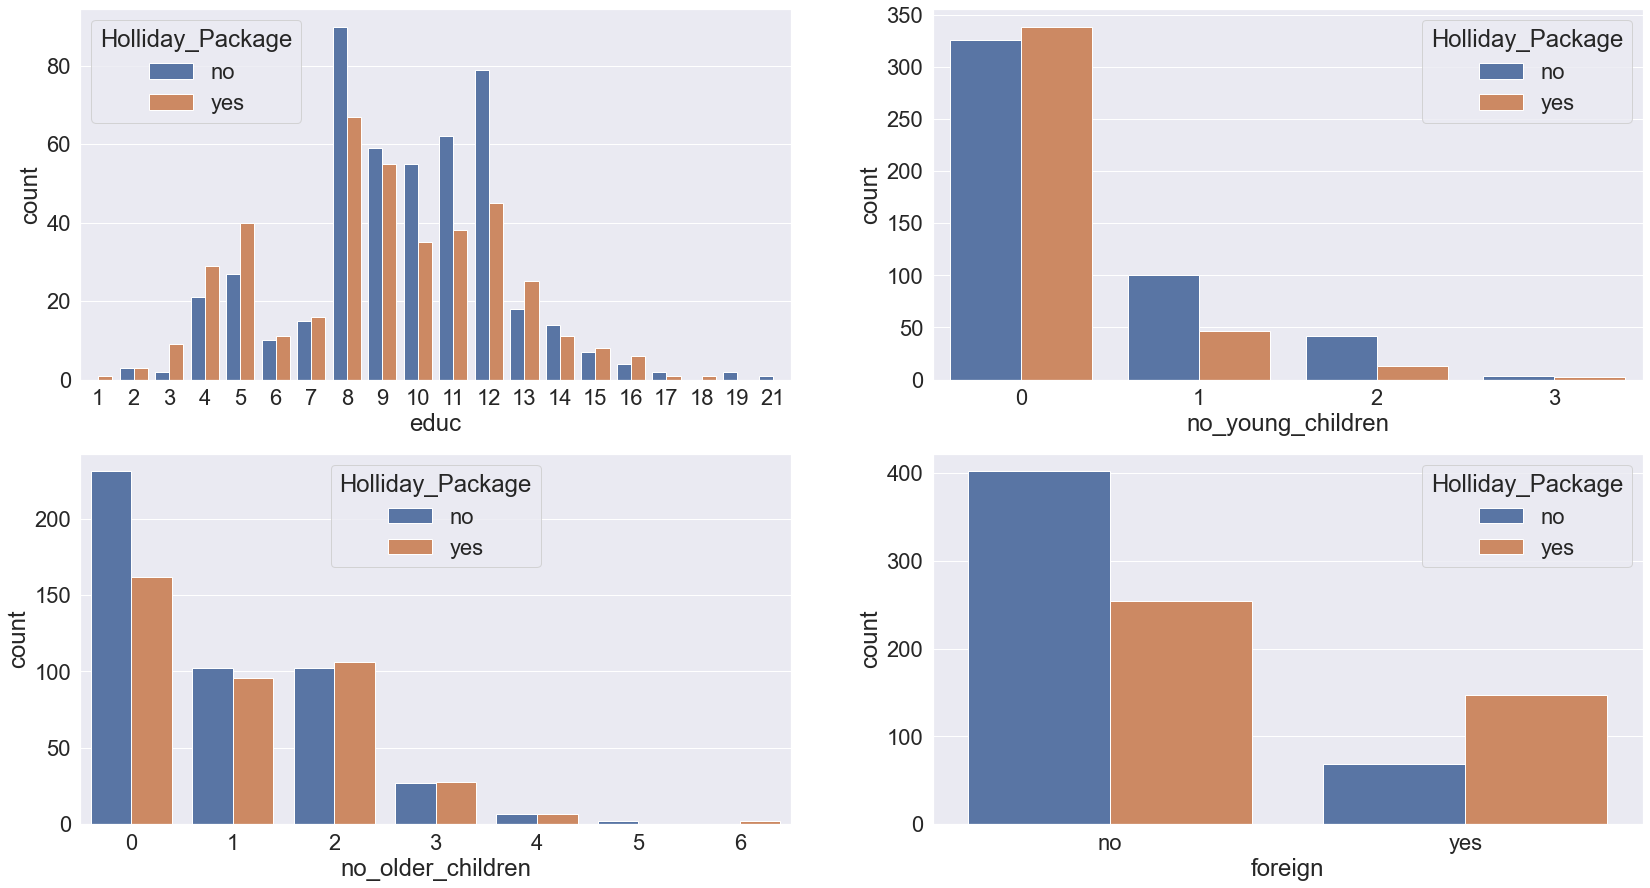

In [131]:
### Count plot
plt.figure(figsize=(28,15))
plt.subplot(2,2,1)
sns.countplot(data=df_ho,hue='Holliday_Package', x='educ')
plt.subplot(2,2,2)
sns.countplot(data=df_ho,hue='Holliday_Package', x='no_young_children')
plt.subplot(2,2,3)
sns.countplot(data=df_ho,hue='Holliday_Package', x='no_older_children')
plt.subplot(2,2,4)
sns.countplot(data=df_ho,hue='Holliday_Package', x='foreign')

**Observations :**

* More Employess opt for Tours if their education level is 3,4,5,6,7,13,14,15,16

* Employees dont opt for tours if they have young child

* Older children count doesnt appearst to have much impact on tour opted by employees or not

* Foreigner employees tends to opt more for the tour

In [132]:
pd.crosstab(df_ho['no_young_children'],df_ho['Holliday_Package'],margins=True)

Holliday_Package    no  yes  All
no_young_children               
0                  326  339  665
1                  100   47  147
2                   42   13   55
3                    3    2    5
All                471  401  872

In [133]:
((100+42+3)/(147+55+5))*100

70.04830917874396

**Observation :**
    
We can see that around 24% of employees have one or more young child. Out of these employees, 70% ((100+42+3)/(147+55+5)) are not opting for tours.

In [134]:
pd.crosstab(df_ho['foreign'],df_ho['Holliday_Package'],margins=True)

Holliday_Package   no  yes  All
foreign                        
no                402  254  656
yes                69  147  216
All               471  401  872

**Observation :**

As per the data, we can say that 68% of foreign employees are opting for the tour packages.

<AxesSubplot:xlabel='age', ylabel='Salary'>

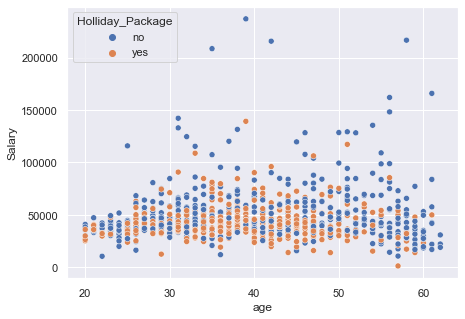

In [135]:
sns.set(font_scale=1)
plt.figure(figsize=(7,5))
sns.scatterplot(x='age',y='Salary',hue='Holliday_Package',data=df_ho)

**Obseravtion :**

Employee age over 50 to 60 have seems to be not taking the holiday package, whereas in the age 30 to 50 and salary less than 50000 people have opted more for holiday package

### Multi-Variate Analysis

In [136]:
df_ho.columns

Index(['Unnamed: 0', 'Holliday_Package', 'Salary', 'age', 'educ',
       'no_young_children', 'no_older_children', 'foreign'],
      dtype='object')

<Figure size 1440x1080 with 0 Axes>

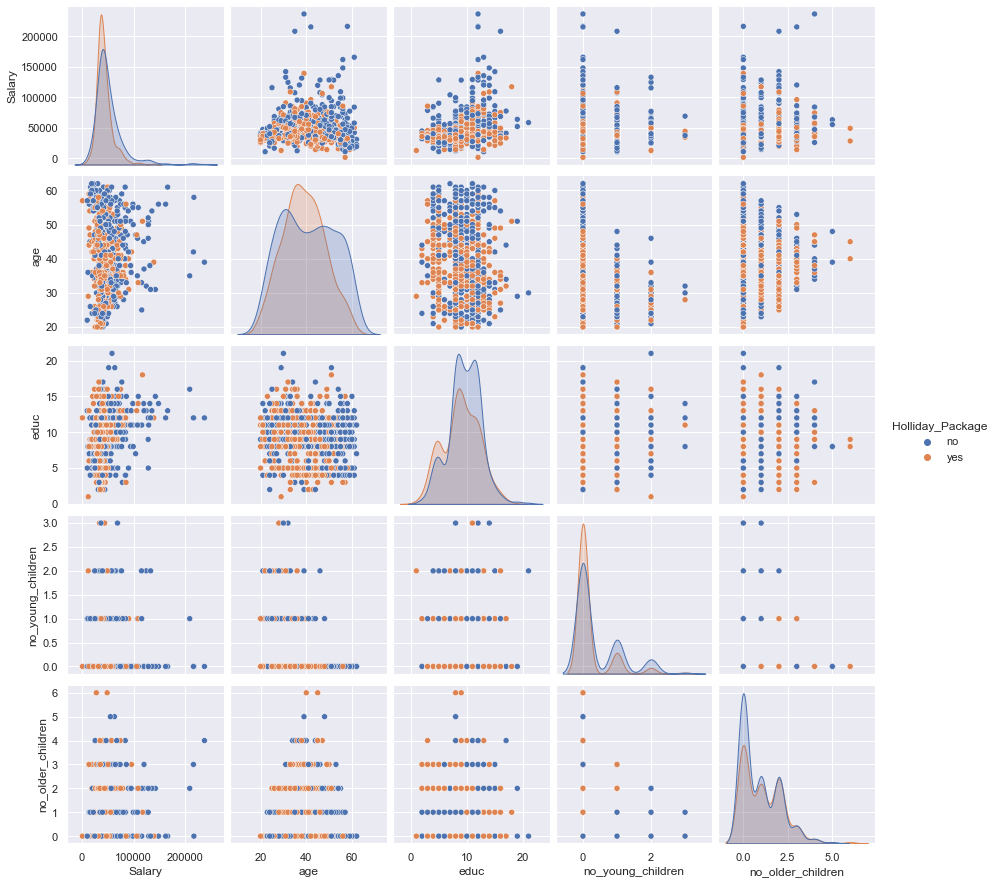

In [137]:
sns.set(font_scale=1)
plt.figure(figsize=(20,15))
sns.pairplot(df_ho2,hue='Holliday_Package',diag_kind='kde')

**Observation :**

* There is not much correlation between the data, the data seems to be normal.

* There is no huge difference in the data distribution among the holiday package, I don’t see any clear two different distribution in the data

### Correlation matrix

In [138]:
corr = df_ho2.corr().T
corr

Salary       age      educ  no_young_children  \
Salary             1.000000  0.071709  0.326540          -0.029664   
age                0.071709  1.000000 -0.149294          -0.519093   
educ               0.326540 -0.149294  1.000000           0.098350   
no_young_children -0.029664 -0.519093  0.098350           1.000000   
no_older_children  0.113772 -0.116205 -0.036321          -0.238428   

                   no_older_children  
Salary                      0.113772  
age                        -0.116205  
educ                       -0.036321  
no_young_children          -0.238428  
no_older_children           1.000000

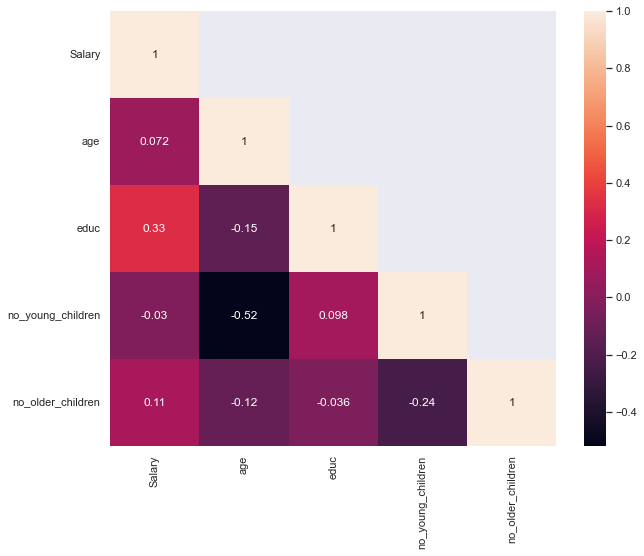

In [139]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True,mask=np.triu(corr.corr(),+1));

**Observation :**
    
We can see in heatmap & correlation matrix that

* Salary has correlation with educ.

* Age is negatively correlated with No_young_children

## Q.2 Use the Pre-processed Full Data to develop a logistic regression model to identify significant predictors. Check whether the proposed model is free of multicollinearity. Apply variable selection method as required. Show all intermediate models leading to the final model. Justify your choice of the final model. Which are the significant predictors? Compare values of model selection criteria for proposed models. Compare as many criteria as you feel are suitable.

In [140]:
for column in df_ho1.columns:
    if df_ho1[column].dtype == 'object':
        print(column,': ',df_ho1[column].nunique())
        print(df_ho1[column].value_counts().sort_values())
        print('\n')

HolidayPackage :  2
yes    401
no     471
Name: HolidayPackage, dtype: int64


Foreign :  2
yes    216
no     656
Name: Foreign, dtype: int64




### Encoding object data to Numerical


### Creating the dummy variables

In [141]:
df_ho_dummy = pd.get_dummies(df_ho1,drop_first=True)
df_ho_dummy.head()

Salary  Age  Educ  No_young_children  No_older_children  \
0  48412.0   30     8                  1                  1   
1  37207.0   45     8                  0                  1   
2  58022.0   46     9                  0                  0   
3  66503.0   31    11                  2                  0   
4  66734.0   44    12                  0                  2   

   HolidayPackage_yes  Foreign_yes  
0                   0            0  
1                   1            0  
2                   0            0  
3                   0            0  
4                   0            0

In [142]:
df_ho_dummy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salary              872 non-null    float64
 1   Age                 872 non-null    int64  
 2   Educ                872 non-null    int64  
 3   No_young_children   872 non-null    int64  
 4   No_older_children   872 non-null    int64  
 5   HolidayPackage_yes  872 non-null    uint8  
 6   Foreign_yes         872 non-null    uint8  
dtypes: float64(1), int64(4), uint8(2)
memory usage: 35.9 KB


### Building Logistical Regression Model

##### Variance Inflation Factor (VIF) for checking Multicollinearity

In [143]:
def vif_cal(input_data):
    x_vars = input_data
    xvar_names = input_data.columns
    for i in range(0,xvar_names.shape[0]):
        y = x_vars[xvar_names[i]]
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = SM.ols(formula = 'y~x',data = x_vars).fit().rsquared
        vif = round(1/(1-rsq),2)
        print(xvar_names[i],"VIF = ",vif)

In [144]:
vif_cal(input_data=df_ho_dummy[['Salary', 'Age', 'Educ', 'No_young_children', 'No_older_children','Foreign_yes']])

Salary VIF =  1.2
Age VIF =  1.56
Educ VIF =  1.41
No_young_children VIF =  1.57
No_older_children VIF =  1.19
Foreign_yes VIF =  1.27


**Observation**

If VIF is greater than 5, we can choose to drop the variable as there can be a problem of multicollinearity.

Since all the VIF less than 5 thus **No Multicollinearity**



### Model 1

In [145]:
import statsmodels.formula.api as sm

In [146]:
df_ho_dummy.columns

Index(['Salary', 'Age', 'Educ', 'No_young_children', 'No_older_children',
       'HolidayPackage_yes', 'Foreign_yes'],
      dtype='object')

In [147]:
f_1 = 'HolidayPackage_yes~Salary+Age+Educ+No_young_children+No_older_children+Foreign_yes'

In [148]:
model_1 = sm.logit(formula =f_1, data =df_ho_dummy).fit()
model_1.summary()

Optimization terminated successfully.
         Current function value: 0.604108
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     HolidayPackage_yes   No. Observations:                  872
Model:                          Logit   Df Residuals:                      865
Method:                           MLE   Df Model:                            6
Date:                Wed, 26 Oct 2022   Pseudo R-squ.:                  0.1244
Time:                        11:23:31   Log-Likelihood:                -526.78
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 9.138e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.5432      0.559      4.550      0.000       1.448       3.639
Salary            -2.088e-05   5.26e-06     -3.970      0.000   -3.12e-05   -1.06e-05
Age                  -0.0496      0.009     -5.491      0.000      -0.067      -0.032
Educ                  0.0342      0.029      1.172      0.241      -0.023       0.091
No_young_children    -1.3287      0.180     -7.386      0.000      -1.681      -0.976
No_older_children    -0.0251      0.074     -0.341      0.733      -0.169       0.119
Foreign_yes           1.3037      0.200      6.519      0.000       0.912       1.696
=====================================================================================
"""

**Observation :**

We can see that the p value of No_older_children is the highest (.733) and it is greator than 0.05.

Hence it confirms that No_older_children attribute has no impact on dependent variable HolidayPackage

In [149]:
print('The adjusted pseudo R-square value is', 1 - ((model_1.llf - model_1.df_model)/model_1.llnull))

The adjusted pseudo R-square value is 0.11440780487420366


### Model 2 (Droping 'No_older_children ')

In [150]:
f_2 = 'HolidayPackage_yes~Salary+Age+Educ+No_young_children+Foreign_yes'

In [151]:
model_2 = sm.logit(formula =f_2, data =df_ho_dummy).fit()
model_2.summary()

Optimization terminated successfully.
         Current function value: 0.604175
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     HolidayPackage_yes   No. Observations:                  872
Model:                          Logit   Df Residuals:                      866
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Oct 2022   Pseudo R-squ.:                  0.1243
Time:                        11:23:31   Log-Likelihood:                -526.84
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 1.671e-30
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.4783      0.525      4.724      0.000       1.450       3.506
Salary            -2.117e-05   5.19e-06     -4.079      0.000   -3.13e-05    -1.1e-05
Age                  -0.0487      0.009     -5.677      0.000      -0.065      -0.032
Educ                  0.0351      0.029      1.209      0.227      -0.022       0.092
No_young_children    -1.3080      0.169     -7.747      0.000      -1.639      -0.977
Foreign_yes           1.3028      0.200      6.517      0.000       0.911       1.695
=====================================================================================
"""

In [152]:
vif_cal(input_data=df_ho_dummy[['Salary', 'Age', 'Educ', 'No_young_children','Foreign_yes']])

Salary VIF =  1.17
Age VIF =  1.42
Educ VIF =  1.4
No_young_children VIF =  1.37
Foreign_yes VIF =  1.27


**Observation :**

* VIF indicates there is no Multicollinearity problem

* Based on 'p value' lets drop Educ as its highest (0.227) and it is greator than 0.05. Thus its not significant

In [153]:
print('The adjusted pseudo R-square value is', 1 - ((model_2.llf - model_2.df_model)/model_2.llnull))

The adjusted pseudo R-square value is 0.11597348232009375


### Model 3 (Droping 'Educ ')

In [154]:
f_3 = 'HolidayPackage_yes~Salary+Age+No_young_children+Foreign_yes'

In [155]:
model_3 = sm.logit(formula =f_3, data =df_ho_dummy).fit()
model_3.summary()

Optimization terminated successfully.
         Current function value: 0.605017
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:     HolidayPackage_yes   No. Observations:                  872
Model:                          Logit   Df Residuals:                      867
Method:                           MLE   Df Model:                            4
Date:                Wed, 26 Oct 2022   Pseudo R-squ.:                  0.1231
Time:                        11:23:32   Log-Likelihood:                -527.58
converged:                       True   LL-Null:                       -601.61
Covariance Type:            nonrobust   LLR p-value:                 5.267e-31
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.8128      0.448      6.282      0.000       1.935       3.690
Salary            -1.932e-05   4.94e-06     -3.911      0.000    -2.9e-05   -9.64e-06
Age                  -0.0504      0.008     -5.962      0.000      -0.067      -0.034
No_young_children    -1.3023      0.169     -7.707      0.000      -1.633      -0.971
Foreign_yes           1.2092      0.183      6.592      0.000       0.850       1.569
=====================================================================================
"""

**Observation :**

Now all p values are less than 0.05. Hence all these attributes and their coeffficients have importance in deciding the target variable HolidayPackage.

Also we can see that coef value is highest for No_young_children followed by foreign, Age and salary

Salary coefficient value is very low i.e -00001932. So its impact is almost 0 on dependent variable

'p values' indicate that all the variable are significant at 95% confidence level

In [156]:
print('The adjusted pseudo R-square value is', 1 - ((model_3.llf - model_3.df_model)/model_3.llnull))

The adjusted pseudo R-square value is 0.11641507873864654


**Observation :**

We notice that the Adjusted pseudo R-square value have increased

In [157]:
model_3.params

Intercept            2.812780
Salary              -0.000019
Age                 -0.050426
No_young_children   -1.302317
Foreign_yes          1.209164
dtype: float64

In [158]:
for i,j in np.array(model_3.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(2.81) * Intercept + (-0.0) * Salary + (-0.05) * Age + (-1.3) * No_young_children + (1.21) * Foreign_yes + 

**Observation :**

Logistic regression equation is as shown below :-

Log (odd) = (2.81) + (-0.0) Salary + (-0.05) Age + (-1.3) No_young_children + (1.21) Foreign_yes

We can see that salary coefficient is very small , this it can be removed. So our equation would become :-

Log (odd) = (2.81) + (-0.05) Age + (-1.3) No_young_children + (1.21) * Foreign_yes

Most important attribute here is No of young children followed by Foreign and age

### Prediction on Data

Now, let us see the predicted probability values.

There are probabilities of an individual going to HolidayPackage

In [159]:
y_prob_pred_3 = model_3.predict()
y_prob_pred_3

array([0.28134675, 0.45627236, 0.3479663 , 0.06660152, 0.33281546,
       0.3786626 , 0.21113616, 0.62334247, 0.51279809, 0.48804711,
       0.43035628, 0.29066759, 0.05158982, 0.17218461, 0.17218461,
       0.24808831, 0.32836373, 0.32894233, 0.31607634, 0.2750884 ,
       0.58527883, 0.310906  , 0.4012165 , 0.45325044, 0.35414477,
       0.41733665, 0.12624157, 0.26794571, 0.34410074, 0.63417739,
       0.21113616, 0.63910927, 0.33067881, 0.40458485, 0.23418444,
       0.3672405 , 0.4212648 , 0.2196574 , 0.41202504, 0.42096652,
       0.3678671 , 0.69673671, 0.54529185, 0.32818036, 0.55920554,
       0.46921057, 0.04344661, 0.51129782, 0.30052008, 0.47101854,
       0.43864061, 0.62719535, 0.60149048, 0.48404714, 0.31768058,
       0.47796929, 0.21593554, 0.17695323, 0.31204351, 0.32772057,
       0.3014498 , 0.62607854, 0.13915149, 0.31790874, 0.39845238,
       0.58682073, 0.28375699, 0.13915149, 0.28456042, 0.47948625,
       0.20963911, 0.59022724, 0.32583574, 0.14020555, 0.45106

Let us see the spread of the probability of the HolidayPackage.

In [160]:
df_ho_dummy.columns

Index(['Salary', 'Age', 'Educ', 'No_young_children', 'No_older_children',
       'HolidayPackage_yes', 'Foreign_yes'],
      dtype='object')

Text(0, 0.5, 'HolidayPackage Predicted')

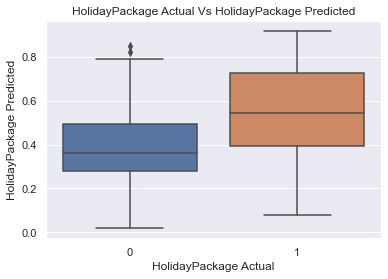

In [161]:
sns.boxplot(x=df_ho_dummy['HolidayPackage_yes'],y=y_prob_pred_3)
plt.xlabel('HolidayPackage_yes');
plt.title('HolidayPackage Actual Vs HolidayPackage Predicted')
plt.xlabel('HolidayPackage Actual')
plt.ylabel('HolidayPackage Predicted')

**Observation :**

From the above boxplot, we need to decide on one such value of a cut-off which gives most resonable power of the model  

### Choosing a different cut-off method for the predictions on the Probability Predictions Data

0.1 

Accuracy Score 0.4759
F1 Score 0.6347 

Confusion Matrix


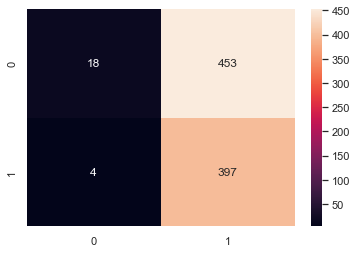

True Negative: 18 
False Positives: 453 
False Negatives: 4 
True Positives: 397 


0.2 

Accuracy Score 0.5138
F1 Score 0.6478 

Confusion Matrix


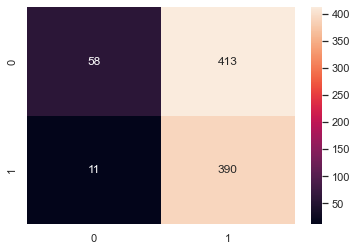

True Negative: 58 
False Positives: 413 
False Negatives: 11 
True Positives: 390 


0.3 

Accuracy Score 0.5745
F1 Score 0.6587 

Confusion Matrix


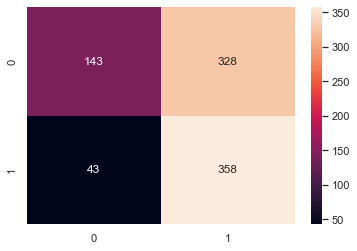

True Negative: 143 
False Positives: 328 
False Negatives: 43 
True Positives: 358 


0.4 

Accuracy Score 0.6514
F1 Score 0.6607 

Confusion Matrix


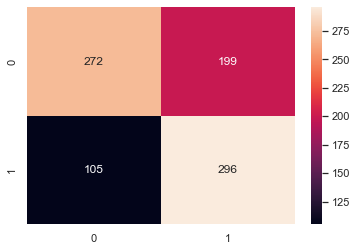

True Negative: 272 
False Positives: 199 
False Negatives: 105 
True Positives: 296 


0.5 

Accuracy Score 0.6709
F1 Score 0.6106 

Confusion Matrix


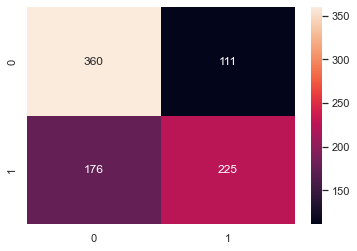

True Negative: 360 
False Positives: 111 
False Negatives: 176 
True Positives: 225 


0.6 

Accuracy Score 0.6479
F1 Score 0.5088 

Confusion Matrix


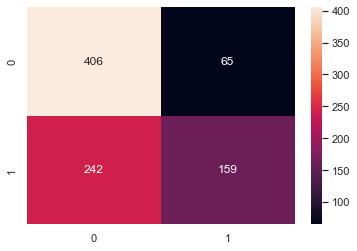

True Negative: 406 
False Positives: 65 
False Negatives: 242 
True Positives: 159 


0.7 

Accuracy Score 0.6388
F1 Score 0.4199 

Confusion Matrix


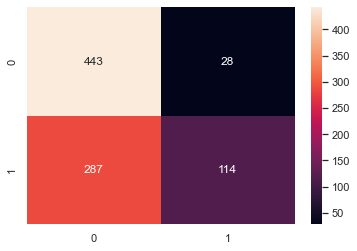

True Negative: 443 
False Positives: 28 
False Negatives: 287 
True Positives: 114 


0.8 

Accuracy Score 0.5883
F1 Score 0.1969 

Confusion Matrix


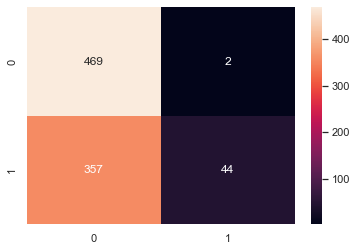

True Negative: 469 
False Positives: 2 
False Negatives: 357 
True Positives: 44 


0.9 

Accuracy Score 0.5424
F1 Score 0.0099 

Confusion Matrix


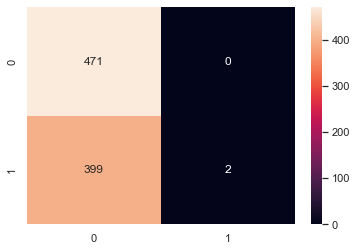

True Negative: 471 
False Positives: 0 
False Negatives: 399 
True Positives: 2 




In [162]:
for j in np.arange(0.1,1,0.1):
    Holidaypackage_prob = j #defining the cut-off value of our choice
    Holidaypackage_cutoff_data=[]#defining an empty list
    for i in range(0,len(df_ho_dummy['HolidayPackage_yes'])):#defining a loop for the length of the test data
        if np.array(y_prob_pred_3[:])[i] >= Holidaypackage_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        Holidaypackage_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(df_ho_dummy['HolidayPackage_yes'],Holidaypackage_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(df_ho_dummy['HolidayPackage_yes'],Holidaypackage_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(df_ho_dummy['HolidayPackage_yes'],Holidaypackage_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();
    tn, fp, fn, tp = metrics.confusion_matrix(df_ho_dummy['HolidayPackage_yes'],Holidaypackage_cutoff_data).ravel()
    print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n\n')

### Let us take a cut-off at 0.5 and check power of the model

In [163]:
y_class_pred=(y_prob_pred_3>=0.5).astype(int)

### Model Evaluation on Data at cut-off 0.5 using AUC-ROC curve

In [164]:
from sklearn import metrics

0.5 

Accuracy Score 0.6709
F1 Score 0.6106 

True Negative: 360 
False Positives: 111 
False Negatives: 176 
True Positives: 225 

Confusion Matrix :



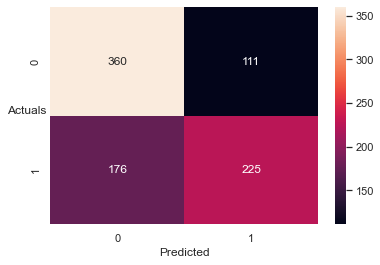

<Figure size 432x288 with 0 Axes>

In [165]:
sns.heatmap((metrics.confusion_matrix(df_ho_dummy['HolidayPackage_yes'],y_class_pred)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);
print("0.5",'\n')
print('Accuracy Score',round(metrics.accuracy_score(df_ho_dummy['HolidayPackage_yes'],y_class_pred),4))
print('F1 Score',round(metrics.f1_score(df_ho_dummy['HolidayPackage_yes'],y_class_pred),4),'\n')
plt.figure(figsize=(6,4))

tn, fp, fn, tp = metrics.confusion_matrix(df_ho_dummy['HolidayPackage_yes'],y_class_pred).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')

print('Confusion Matrix :''\n')

### Classification report at cut-off 0.05

In [166]:
print(metrics.classification_report(df_ho_dummy['HolidayPackage_yes'],y_class_pred,digits=3))

              precision    recall  f1-score   support

           0      0.672     0.764     0.715       471
           1      0.670     0.561     0.611       401

    accuracy                          0.671       872
   macro avg      0.671     0.663     0.663       872
weighted avg      0.671     0.671     0.667       872



**Observation :**

With accuracy of 67% and recall rate of 56%, model is only able to predict 56% of total tours which were actually claimed as claimed.

Precision is 67% of data which means, out of total employees predicted by model as opt for tour, 67% employees actually opted for the tour

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for tour or not, for practical purposes, we will be more interested in correctly classifying 1 (employees opting for tour) than 0(employees not opting for tour).

If a employee not opting for tour is incorrectly predicted to be "opted for tour" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for tour is incorrectly predicted to be not opted by the model, then the cost impact would be very high for the tour and travel company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very poor around 56% thus this doesnt looks good enough for classification**

### Calculate the Area Under the Curve (AUC) of the Receiver Operating Characteristic (ROC) curve

AUC: 0.729


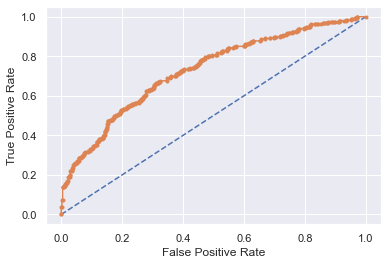

In [167]:
# AUC and ROC for the training data


# calculating on the basis of a person not defaulting
# calculate AUC
auc = metrics.roc_auc_score(df_ho_dummy['HolidayPackage_yes'],y_prob_pred_3)
print('AUC: %.3f' % auc)
# # calculate roc curve
# from sklearn.metrics import roc_curve
fpr, tpr, thresholds = metrics.roc_curve(df_ho_dummy['HolidayPackage_yes'],y_prob_pred_3)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Q.3 Alternatively, if prediction accuracy of employee opting for holiday package or not  is the only objective, then you may want to divide the data into a training and a test set, chosen randomly, and use the training set to develop a model and test set to validate your model. Use the models developed in Part (2) to compare accuracy in training and test sets. Compare the final model of Part (2) and the proposed one in Part (3). Which model provides the most accurate prediction? If the model found in Part (2) is different from the proposed model in Part (3), give an explanation.

### Only for Predictive purposes of Logistic Regression

If we only wanted to predict using Logistic Regression and was not looking for the model building aspect of it, we can do that as well. For this, we will use the same variables as of Model 2 and Model 3.

First we will split the data into train and test. We will build the model on the training data and check the the model performance metrics on the test data. 

We will take the default cut-off of 0.5 to get the class predictions.

### Splitting the data into train and test.

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
Train,Test = train_test_split(df_ho_dummy,test_size=0.3,random_state=10,stratify=df_ho_dummy['HolidayPackage_yes'])

Checking the proportion of 1s and 0s in the target variable in both Training and Test data

In [170]:
print(Train['HolidayPackage_yes'].value_counts(1),'\n')
print(Test['HolidayPackage_yes'].value_counts(1))

0    0.539344
1    0.460656
Name: HolidayPackage_yes, dtype: float64 

0    0.541985
1    0.458015
Name: HolidayPackage_yes, dtype: float64


In [171]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='none',solver='newton-cg')

### Using only the Model 2 (Droping 'No_older_children ') variables to build the model on the training data and predict on the training as well as test data.

In [172]:
Train.columns

Index(['Salary', 'Age', 'Educ', 'No_young_children', 'No_older_children',
       'HolidayPackage_yes', 'Foreign_yes'],
      dtype='object')

In [173]:
model_sklearn_2 = lr.fit(Train[["Salary","Age","Educ","No_young_children","Foreign_yes"]],Train['HolidayPackage_yes'])

In [174]:
# Predicting on the Training Data

model_sklearn_2_pred_train = model_sklearn_2.predict(Train[["Salary","Age","Educ","No_young_children","Foreign_yes"]])

In [175]:
# Predicting on the Test Data

model_sklearn_2_pred_test = model_sklearn_2.predict(Test[["Salary","Age","Educ","No_young_children","Foreign_yes"]])

### Using only the Model 3 (Droping 'Educ ') variables to build the model on the training data and predict on the training as well as test data.

In [176]:
model_sklearn_3 = lr.fit(Train[["Salary","Age","No_young_children","Foreign_yes"]],Train['HolidayPackage_yes'])

In [177]:
# Predicting on the Training Data

model_sklearn_3_pred_train = model_sklearn_3.predict(Train[["Salary","Age","No_young_children","Foreign_yes"]])

In [178]:
# Predicting on the Test Data

model_sklearn_3_pred_test = model_sklearn_3.predict(Test[["Salary","Age","No_young_children","Foreign_yes"]])

## Confusion Matrix check for all the models built

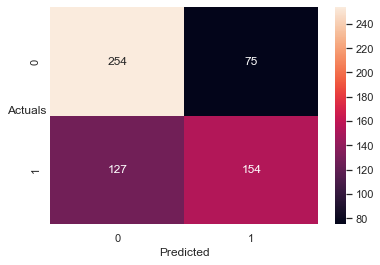

In [179]:
sns.heatmap((metrics.confusion_matrix(Train['HolidayPackage_yes'],model_sklearn_2_pred_train)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

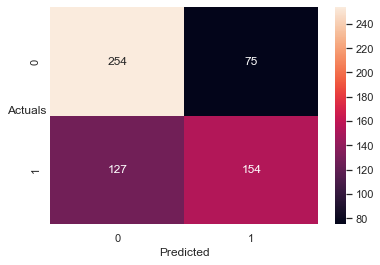

In [180]:
sns.heatmap((metrics.confusion_matrix(Train['HolidayPackage_yes'],model_sklearn_3_pred_train)),annot=True,fmt='.5g');
plt.xlabel('Predicted');
plt.ylabel('Actuals',rotation=0);

In [181]:
print('Accuracy Score - Model 2')
print('Training:', metrics.accuracy_score(Train['HolidayPackage_yes'],model_sklearn_2_pred_train))
print('Testing: ', metrics.accuracy_score(Test['HolidayPackage_yes'],model_sklearn_2_pred_test))

print('\nAccuracy Score - Model 3')
print('Training:', metrics.accuracy_score(Train['HolidayPackage_yes'],model_sklearn_3_pred_train))
print('Testing: ', metrics.accuracy_score(Test['HolidayPackage_yes'],model_sklearn_3_pred_test))

Accuracy Score - Model 2
Training: 0.6688524590163935
Testing:  0.648854961832061

Accuracy Score - Model 3
Training: 0.6688524590163935
Testing:  0.6603053435114504


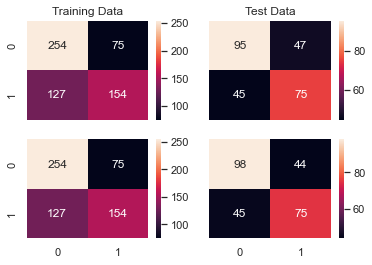

In [182]:

f,a =  plt.subplots(2,2,sharex=True,sharey=True)

#Plotting confusion matrix for the different models for the Training Data

plot_00 = sns.heatmap((metrics.confusion_matrix(Train['HolidayPackage_yes'],model_sklearn_2_pred_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_10 = sns.heatmap((metrics.confusion_matrix(Train['HolidayPackage_yes'],model_sklearn_3_pred_train)),annot=True,fmt='.5g',ax=a[1][0]);



#Plotting confusion matrix for the different models for the Test Data


plot_01 = sns.heatmap((metrics.confusion_matrix(Test['HolidayPackage_yes'],model_sklearn_2_pred_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data')
plot_11 = sns.heatmap((metrics.confusion_matrix(Test['HolidayPackage_yes'],model_sklearn_3_pred_test)),annot=True,fmt='.5g',ax=a[1][1]);


### AUC and ROC for the Training and Testing data Model 2

AUC for Train dataset: 0.660
AUC for test dataset: 0.647


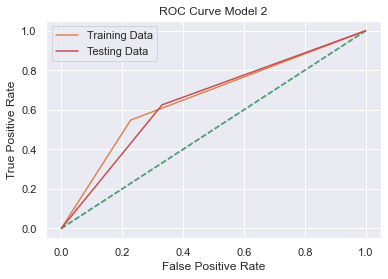

In [183]:

# calculate AUC
train_auc = metrics.roc_auc_score(Train['HolidayPackage_yes'],model_sklearn_2_pred_train)
print('AUC for Train dataset: %.3f' % train_auc)

# # calculate roc curve

from sklearn.metrics import roc_curve
train_fpr, train_tpr, train_thresholds = roc_curve(Train['HolidayPackage_yes'],model_sklearn_2_pred_train)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr,label = 'Training Data')


# calculate AUC
test_auc = metrics.roc_auc_score(Test['HolidayPackage_yes'],model_sklearn_2_pred_test)
print('AUC for test dataset: %.3f' % test_auc)

# calculate roc curve

test_fpr, test_tpr, test_thresholds = roc_curve(Test['HolidayPackage_yes'],model_sklearn_2_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve Model 2')
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


**Observation :**

Model 2 ROC curve have AUC train(0.660) and test(0.647) score.

### Classification_report Model 2

In [184]:
print(metrics.classification_report(Train['HolidayPackage_yes'],model_sklearn_2_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.667     0.772     0.715       329
           1      0.672     0.548     0.604       281

    accuracy                          0.669       610
   macro avg      0.670     0.660     0.660       610
weighted avg      0.669     0.669     0.664       610



**Observation Model 2:**

With accuracy of 67% and recall rate of 54%, model is only able to predict 54% of total tours which were actually claimed as claimed.

Precision is 67% of data which means, out of total employees predicted by model as opt for tour, 67% employees actually opted for the tour

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for tour or not, for practical purposes, we will be more interested in correctly classifying 1 (employees opting for tour) than 0(employees not opting for tour).

If a employee not opting for tour is incorrectly predicted to be "opted for tour" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for tour is incorrectly predicted to be not opted by the model, then the cost impact would be very high for the tour and travel company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very poor around 54% thus this doesnt looks good enough for classification**

### AUC and ROC for the Training and Testing data Model 3

AUC for Train dataset: 0.660
AUC for test dataset: 0.658


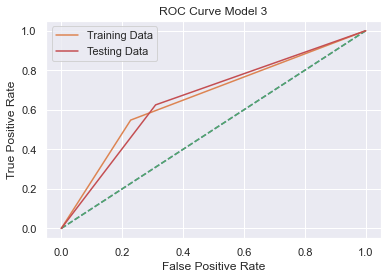

In [185]:

# calculate AUC
train_auc = metrics.roc_auc_score(Train['HolidayPackage_yes'],model_sklearn_3_pred_train)
print('AUC for Train dataset: %.3f' % train_auc)

# # calculate roc curve

from sklearn.metrics import roc_curve
train_fpr, train_tpr, train_thresholds = roc_curve(Train['HolidayPackage_yes'],model_sklearn_3_pred_train)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.plot(train_fpr, train_tpr,label = 'Training Data')


# calculate AUC
test_auc = metrics.roc_auc_score(Test['HolidayPackage_yes'],model_sklearn_3_pred_test)
print('AUC for test dataset: %.3f' % test_auc)

# calculate roc curve

test_fpr, test_tpr, test_thresholds = roc_curve(Test['HolidayPackage_yes'],model_sklearn_3_pred_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve Model 3')
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()


**Observation :**

Model 3 ROC curve have better AUC train(0.660) and test(0.658) score compared to Model 2 ROC curve

### Classification_report Model 3

In [186]:
print(metrics.classification_report(Train['HolidayPackage_yes'],model_sklearn_3_pred_train,digits=3))

              precision    recall  f1-score   support

           0      0.667     0.772     0.715       329
           1      0.672     0.548     0.604       281

    accuracy                          0.669       610
   macro avg      0.670     0.660     0.660       610
weighted avg      0.669     0.669     0.664       610



**Observation Model 3:**

With accuracy of 67% and recall rate of 54%, model is only able to predict 54% of total tours which were actually claimed as claimed.

Precision is 67% of data which means, out of total employees predicted by model as opt for tour, 67% employees actually opted for the tour

F1-score is the harmonic mean of precision and recall, it takes into the effect of both the scores and this value is low if any of these 2 value is low.

Since we are building a model to predict if whether employee will opt for tour or not, for practical purposes, we will be more interested in correctly classifying 1 (employees opting for tour) than 0(employees not opting for tour).

If a employee not opting for tour is incorrectly predicted to be "opted for tour" by the model, then the impact on cost for the travel company would be bare minimum. But if am employee opted for tour is incorrectly predicted to be not opted by the model, then the cost impact would be very high for the tour and travel company. Its a loss of potential lead for the company. Hence recall rate (actual data point identified as True by model) is very important in this scenario.

**As Recall rate of test dataset is very poor around 54% thus this doesnt looks good enough for classification**

### Running other Classification models

Make 5 models using:

* Artificial Neural Network ,

* Decision Tree, 

* Random Forest, 

* Logistic Regression,

* Linear Regression


### Train-Test Split

In [187]:
df_ho_dummy.columns

Index(['Salary', 'Age', 'Educ', 'No_young_children', 'No_older_children',
       'HolidayPackage_yes', 'Foreign_yes'],
      dtype='object')

In [188]:
# Copy all the predictor variables into X dataframe

X = df_ho_dummy.drop(['HolidayPackage_yes'], axis=1)

# Copy target into the y dataframe. 
y = df_ho_dummy[['HolidayPackage_yes']]

In [189]:
X.head()

Salary  Age  Educ  No_young_children  No_older_children  Foreign_yes
0  48412.0   30     8                  1                  1            0
1  37207.0   45     8                  0                  1            0
2  58022.0   46     9                  0                  0            0
3  66503.0   31    11                  2                  0            0
4  66734.0   44    12                  0                  2            0

In [190]:
from sklearn.model_selection import train_test_split

# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [191]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
print (df_ho_dummy.shape)

(610, 6)
(262, 6)
(610, 1)
(262, 1)
(872, 7)


In [192]:
y_train.value_counts(normalize=True)

HolidayPackage_yes
0                     0.539344
1                     0.460656
dtype: float64

In [193]:

y_test.value_counts(normalize=True)

HolidayPackage_yes
0                     0.541985
1                     0.458015
dtype: float64

##### creating user define function so to run model multiple times for different grid search parameters


In [194]:
def run_gridsearch(model,param_grid,X_train, train_labels,cv_value=5,scoring_value='accuracy'):
    grid_search = GridSearchCV(estimator = model, param_grid = param_grid, cv = cv_value, n_jobs =-1,scoring=scoring_value)
    print ("\n Running grid search\n")
    grid_search.fit(X_train, train_labels)
    print ("\n Showing best parameters for the grid search\n")
    print (grid_search.best_params_)
    return grid_search


In [195]:
def check_performance(grid_search,X_train, X_test, train_labels, test_labels):
    best_grid = grid_search.best_estimator_
    ytrain_predict = best_grid.predict(X_train)
    ytest_predict = best_grid.predict(X_test)
    print("\n Classification Report for Train dataset\n")
    print(classification_report(train_labels,ytrain_predict))
    print("\n Classification Report for Test dataset\n")
    print(classification_report(test_labels,ytest_predict))

### Logistic Regression model

In [196]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    3.8s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

In [197]:
# Predicting on Training and Test dataset

ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

In [198]:
# Getting the Predicted Classes and Probs

ytest_predict_prob=model.predict_proba(X_test)

In [199]:
# Model Evaluation Accuracy - Training Data
print ('Model score for training dataset', model.score(X_train, y_train))
print ('Model score for training dataset',model.score(X_test, y_test))

Model score for training dataset 0.6672131147540984
Model score for training dataset 0.648854961832061


#### Probability of AUC and ROC for the training data & test data

AUC for Train dataset: 0.733
AUC for test dataset: 0.733


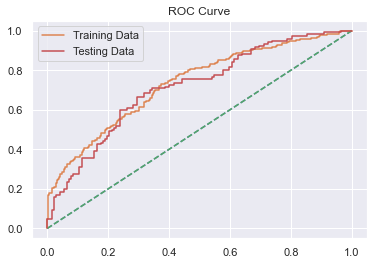

In [200]:
# predict probabilities
probs_train = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_train = probs_train[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs_train)
print('AUC for Train dataset: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr,label = 'Training Data')

# predict probabilities
probs_test = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_test = probs_test[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs_test,)
print('AUC for test dataset: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr,label = 'Testing Data')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

#### Confusion Matrix for the training data and testing data

In [201]:
confusion_matrix(y_train, ytrain_predict)

array([[244,  85],
       [118, 163]], dtype=int64)

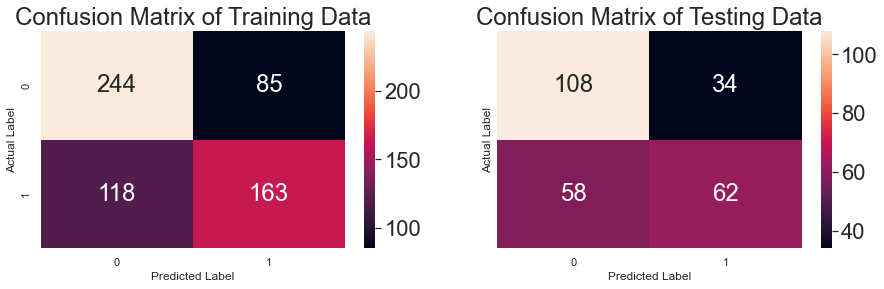

In [202]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (15,4))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,ytrain_predict)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,ytest_predict)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][1].set(xlabel = "Predicted Label",ylabel="Actual Label");

#### Training Data and Test Data Classification Report Comparison

In [203]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,ytrain_predict),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.58      0.62       281

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



**Logistic Regression Conclusion**

Train Data:

* AUC: 73%


* Accuracy: 67%

* Precision: 66%

* f1-Score: 62%

* Recall: 58%

Test Data:

* AUC: 73%

* Accuracy: 65%

* Precision: 65%

* f1-Score: 57%

* Recall: 52%

#### Applying GridSearchCV for Logistic Regression

In [204]:
grid={'penalty':['l2','none','l1'],   
      'solver':['lbfgs','liblinear'],   # 'newton-cg',
      'tol':[0.0001,0.00001]}

lr_model = LogisticRegression(max_iter=10000,n_jobs=-1)

In [205]:
#grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
cv_value=3
grid_search = run_gridsearch(lr_model,grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)
## Scoring - Strategy to evaluate the performance of the cross-validated model on the test set.


 Running grid search


 Showing best parameters for the grid search

{'penalty': 'l1', 'solver': 'liblinear', 'tol': 1e-05}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.67      0.74      0.71       329
           1       0.66      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.65      0.77      0.71       142
           1       0.66      0.52      0.58       120

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.64       262
weighted avg       0.66      0.66      0.65       262



### LDA(Linear Discriminant Analysis) Model

In [206]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [207]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,y_train)

In [208]:
# Prediction

# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

#### Training Data and Test Data Confusion Matrix Comparison 

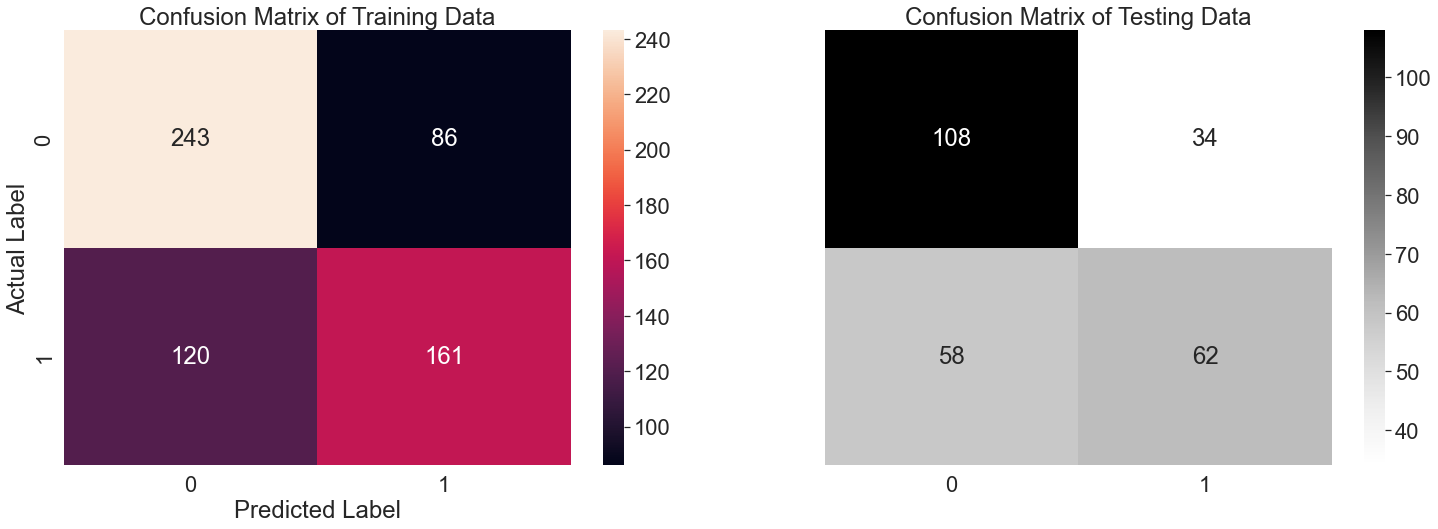

In [209]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False,figsize= (25,8))

#Plotting confusion matrix for the different models for the Training Data
sns.set(font_scale=2)
plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label")
a[0][0].set_title('Confusion Matrix of Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Confusion Matrix of Testing Data')
a[0][0].set(xlabel = "Predicted Label",ylabel="Actual Label");

#### Training Data and Test Data Classification Report Comparison

In [210]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       329
           1       0.65      0.57      0.61       281

    accuracy                           0.66       610
   macro avg       0.66      0.66      0.66       610
weighted avg       0.66      0.66      0.66       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.65      0.76      0.70       142
           1       0.65      0.52      0.57       120

    accuracy                           0.65       262
   macro avg       0.65      0.64      0.64       262
weighted avg       0.65      0.65      0.64       262
 



#### Probability prediction for the training and test data

In [211]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(X_test)

AUC for the Training Data: 0.731
AUC for the Test Data: 0.714


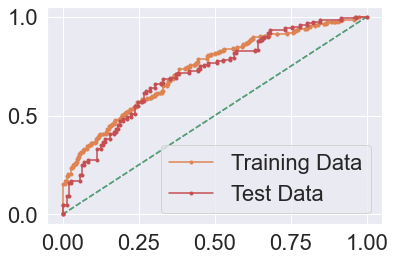

In [212]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

**LDA Conclusion**

Train Data:

* AUC: 73%


* Accuracy: 66%

* Precision: 65%

* f1-Score: 61%

* Recall: 57%

Test Data:

* AUC: 71%

* Accuracy: 65%

* Precision: 65%

* f1-Score: 57%

* Recall: 52%

#### Scaling

In [213]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler() 

In [214]:
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(X_train)
x_test_scaled=ss.transform(X_test)
print (x_train_scaled.shape)
print (X_train.shape)
print (x_test_scaled.shape)
print (X_test.shape)

(610, 6)
(610, 6)
(262, 6)
(262, 6)


In [215]:

x_train_scaled[0]

array([-0.43924382,  0.72340773,  0.86023297, -0.52496388,  0.96332758,
        1.70594736])

In [216]:
## Train and test dataframe have been scaled now
X_train_bkp=X_train.copy()
X_test_bkp=X_test.copy()

In [217]:
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [218]:
lgr = LogisticRegression(penalty='l1', solver='liblinear',tol=0.0001,verbose=True,n_jobs=-1,random_state=1)
lda = LinearDiscriminantAnalysis()
anncl = MLPClassifier(hidden_layer_sizes=(500),random_state=1, max_iter=10000)#you are free to tweak the layer sizes
rfcl = RandomForestClassifier(random_state=1)
dtcl = DecisionTreeClassifier(random_state=1)

In [219]:
def extract_classfication_meterics(y,y_predict):
    df_metrics=classification_report(y, y_predict,output_dict=True)
    #print(classification_report(y, y_predict))
    df_metrics=pd.DataFrame(df_metrics).transpose()
    precision = round(df_metrics.loc["1"][0],2)
    recall = round(df_metrics.loc["1"][1],2)
    f1 = round(df_metrics.loc["1"][2],2)
    return precision, recall, f1

In [220]:
models=[lgr,lda,dtcl,rfcl,anncl]
#models=[lgr,ldar]
modelnames = ['LogR','LDA','DT','RF','ANN']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in models:  
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
    if (i != anncl):       
        i.fit(X_train,y_train)
        ytrain_predict = i.predict(X_train)
        ytest_predict = i.predict(X_test)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(X_train, y_train),2))
        scores_test.append(round(i.score(X_test, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(X_train)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           
        
        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(X_test)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    else:                         
        i.fit(x_train_scaled,y_train)
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(x_train_scaled, y_train),2))
        scores_test.append(round(i.score(x_test_scaled, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(x_train_scaled)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(x_test_scaled)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(x_train_scaled)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           

        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(x_test_scaled)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    j=j+1

[LibLinear]

In [221]:
scores_train

[0.67, 0.66, 1.0, 1.0, 0.72]

### Summary Of Train and Test Accuracy on the 5 Models

In [222]:
df_ho_dummy_meteric_comp=(pd.DataFrame({'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,'Test f1': f1_test},
            index=['Logistic Regression','LDA','Decision Tree','Random Forest', 'ANN']))
#            index=['Logistic Regression','LDA']))
df_ho_dummy_meteric_comp.T   

Logistic Regression   LDA  Decision Tree  Random Forest   ANN
Train Accuracy                  0.67  0.66           1.00           1.00  0.72
Test Accuracy                   0.66  0.65           0.58           0.64  0.67
Train AUC                       0.73  0.73           1.00           1.00  0.80
Test AUC                        0.72  0.71           0.58           0.68  0.73
Train Recall                    0.57  0.57           1.00           1.00  0.69
Test Recall                     0.52  0.52           0.51           0.59  0.63
Train precision                 0.66  0.65           1.00           1.00  0.70
Test precision                  0.67  0.65           0.55           0.61  0.64
Train f1                        0.61  0.61           1.00           1.00  0.69
Test f1                         0.58  0.57           0.53           0.60  0.64

### Running Grid search for Decision Tree

In [223]:
dt_model = DecisionTreeClassifier(random_state=1)
cv_value = 3
param_grid = {
    'max_depth': [3,4], #[6,7, 13, 20],
    'min_samples_leaf': [4], #[3,5,7,10],
    'min_samples_split': [66,67,68] #[30,40,50,60,75,80,85,90,95]
}
grid_search = run_gridsearch(dt_model,param_grid,X_train, y_train,cv_value)
check_performance(grid_search,X_train, X_test, y_train, y_test)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 67}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.70      0.82      0.76       329
           1       0.74      0.59      0.66       281

    accuracy                           0.72       610
   macro avg       0.72      0.71      0.71       610
weighted avg       0.72      0.72      0.71       610


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       142
           1       0.63      0.51      0.56       120

    accuracy                           0.64       262
   macro avg       0.64      0.63      0.63       262
weighted avg       0.64      0.64      0.63       262



### Running Grid search for Random Forest

In [224]:
cv_value=3
param_grid = {
    'max_depth': [4], # 3,5
    'max_features': [3], #5,4,2
    'min_samples_leaf': [8], #4,9,7
    'min_samples_split': [56], #100,70,62,61,54,55,58,59
    'n_estimators': [480,490,493]
}

grid_search = run_gridsearch(rfcl,param_grid,X_train, y_train,cv_value)

check_performance(grid_search,X_train, X_test, y_train, y_test)


 Running grid search


 Showing best parameters for the grid search

{'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 56, 'n_estimators': 490}

 Classification Report for Train dataset

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       329
           1       0.74      0.63      0.68       281

    accuracy                           0.73       610
   macro avg       0.73      0.72      0.72       610
weighted avg       0.73      0.73      0.73       610


 Classification Report for Test dataset

              precision    recall  f1-score   support

           0       0.68      0.73      0.70       142
           1       0.65      0.58      0.61       120

    accuracy                           0.66       262
   macro avg       0.66      0.66      0.66       262
weighted avg       0.66      0.66      0.66       262



### Running Grid search for ANN (Artificial Neural Network)

In [225]:
param_grid = {
    'hidden_layer_sizes': [200,500,(100,100),], #(100,100,100)
    'activation': [ 'relu'],  #'logistic',
    'solver': [ 'adam'], #'sgd',
    'tol': [0.001],  #0.01
    'max_iter' : [10000],
    'verbose':[True]
}

grid_search = run_gridsearch(anncl,param_grid,x_train_scaled, y_train,cv_value)

check_performance(grid_search,x_train_scaled, x_test_scaled, y_train, y_test)


 Running grid search

Iteration 1, loss = 0.69983426
Iteration 2, loss = 0.67105069
Iteration 3, loss = 0.65430693
Iteration 4, loss = 0.64164855
Iteration 5, loss = 0.62953958
Iteration 6, loss = 0.62002070
Iteration 7, loss = 0.61274994
Iteration 8, loss = 0.60867719
Iteration 9, loss = 0.60392725
Iteration 10, loss = 0.59904436
Iteration 11, loss = 0.59729286
Iteration 12, loss = 0.59424427
Iteration 13, loss = 0.59118633
Iteration 14, loss = 0.58689786
Iteration 15, loss = 0.58402397
Iteration 16, loss = 0.58225562
Iteration 17, loss = 0.58015598
Iteration 18, loss = 0.57748821
Iteration 19, loss = 0.57601157
Iteration 20, loss = 0.57465818
Iteration 21, loss = 0.57309861
Iteration 22, loss = 0.57138661
Iteration 23, loss = 0.57160678
Iteration 24, loss = 0.57078457
Iteration 25, loss = 0.56831801
Iteration 26, loss = 0.56659786
Iteration 27, loss = 0.56616648
Iteration 28, loss = 0.56803403
Iteration 29, loss = 0.56873050
Iteration 30, loss = 0.56574804
Iteration 31, loss = 0.560

### Putting pruned parameters to the classification models

In [226]:
lgr = LogisticRegression(penalty='l1', solver='liblinear',tol=0.0001,verbose=True,n_jobs=-1,random_state=1)
lda = LinearDiscriminantAnalysis()
anncl = MLPClassifier(random_state=1,activation='relu',hidden_layer_sizes=(100,100),max_iter=10000,solver='adam',tol=0.001,verbose=True)#you are free to tweak the layer sizes
rfcl = RandomForestClassifier(random_state=1,max_depth=4,max_features=3,min_samples_leaf=8,n_estimators=490)
dtcl = DecisionTreeClassifier(random_state=1,max_depth=4,min_samples_leaf=4,min_samples_split=67)

In [227]:
models=[lgr,lda,dtcl,rfcl,anncl]
#models=[lgr,ldar]
modelnames = ['LogR','LDA','DT','RF','ANN']
j=0
scores_train=[]
scores_test=[]
precision_train=[]
precision_test=[]
recall_train=[]
recall_test=[]
f1_train=[]
f1_test=[]
auc_train=[]
auc_test=[]
train_fpr=[]
test_fpr=[]
train_tpr=[]
test_tpr=[]
train_thresholds=[]
test_thresholds=[]

for i in models:  
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    print (modelnames[j])
    if (i != anncl):       
        i.fit(X_train,y_train)
        scores_train.append(round(i.score(X_train, y_train),2))
        scores_test.append(round(i.score(X_test, y_test),2))

        print(i)
        ytrain_predict = i.predict(X_train)
        ytest_predict = i.predict(X_test)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(X_train)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(X_test)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(X_train)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           
        
        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(X_test)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    else:                         
        i.fit(x_train_scaled,y_train)
        ytrain_predict = i.predict(x_train_scaled)
        ytest_predict = i.predict(x_test_scaled)
        X_train_bkp["predicted_"+modelnames[j]] = ytrain_predict
        X_test_bkp["predicted_"+modelnames[j]] =ytest_predict
        
        scores_train.append(round(i.score(x_train_scaled, y_train),2))
        scores_test.append(round(i.score(x_test_scaled, y_test),2))
        
        precision, recall, f1 = extract_classfication_meterics(y_train,ytrain_predict)
        precision_train.append(precision)
        recall_train.append(recall)
        f1_train.append(f1)

        precision, recall, f1 = extract_classfication_meterics(y_test,ytest_predict)
        precision_test.append(precision)
        recall_test.append(recall)
        f1_test.append(f1)
       
        auc_train.append(round(roc_auc_score(y_train, i.predict_proba(x_train_scaled)[:, 1]),2))
        auc_test.append(round(roc_auc_score(y_test, i.predict_proba(x_test_scaled)[:, 1]),2))

        fpr, tpr, thresholds = roc_curve(y_train, i.predict_proba(x_train_scaled)[:, 1])
        train_fpr.append(fpr)
        train_tpr.append(tpr)
        train_thresholds.append(thresholds)           

        fpr, tpr, thresholds = roc_curve(y_test, i.predict_proba(x_test_scaled)[:, 1])
        test_fpr.append(fpr)
        test_tpr.append(tpr)
        test_thresholds.append(thresholds)           
        
    j=j+1

LogR
[LibLinear]LogisticRegression(n_jobs=-1, penalty='l1', random_state=1, solver='liblinear',
                   verbose=True)
LDA
LinearDiscriminantAnalysis()
DT
DecisionTreeClassifier(max_depth=4, min_samples_leaf=4, min_samples_split=67,
                       random_state=1)
RF
RandomForestClassifier(max_depth=4, max_features=3, min_samples_leaf=8,
                       n_estimators=490, random_state=1)
ANN
Iteration 1, loss = 0.69983426
Iteration 2, loss = 0.67105069
Iteration 3, loss = 0.65430693
Iteration 4, loss = 0.64164855
Iteration 5, loss = 0.62953958
Iteration 6, loss = 0.62002070
Iteration 7, loss = 0.61274994
Iteration 8, loss = 0.60867719
Iteration 9, loss = 0.60392725
Iteration 10, loss = 0.59904436
Iteration 11, loss = 0.59729286
Iteration 12, loss = 0.59424427
Iteration 13, loss = 0.59118633
Iteration 14, loss = 0.58689786
Iteration 15, loss = 0.58402397
Iteration 16, loss = 0.58225562
Iteration 17, loss = 0.58015598
Iteration 18, loss = 0.57748821
Iteration 19, l

AUC for LogR is: 0.73
AUC for LDA is: 0.73
AUC for DT is: 0.78
AUC for RF is: 0.82
AUC for ANN is: 0.83


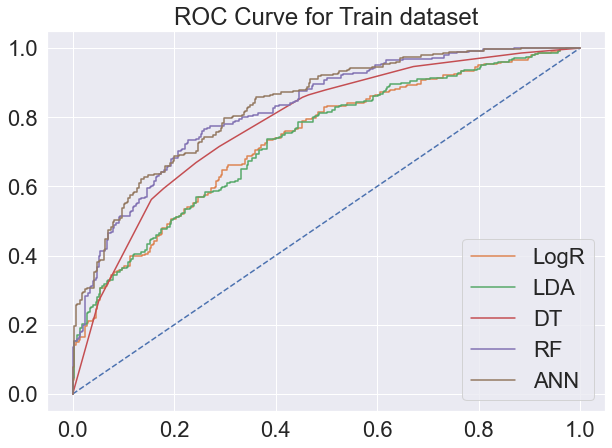

In [228]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,5):
    plt.plot(train_fpr[i], train_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_train[j])
    j=j+1
plt.title('ROC Curve for Train dataset')
plt.legend(loc='best')
plt.show()

AUC for LogR is: 0.72
AUC for LDA is: 0.71
AUC for DT is: 0.69
AUC for RF is: 0.72
AUC for ANN is: 0.73


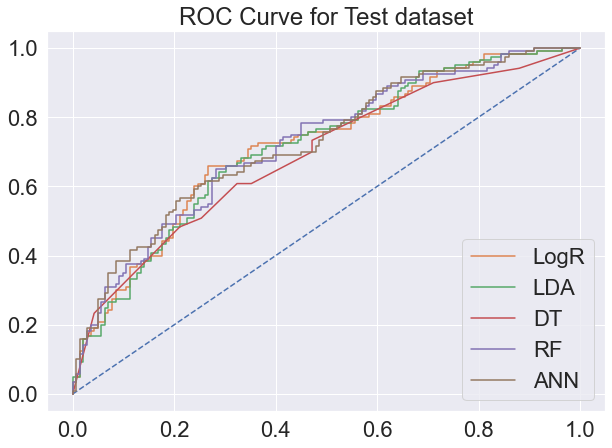

In [229]:
plt.figure(figsize=(10 ,7))
plt.plot([0, 1], [0, 1], linestyle='--')
j=0
for i in range(0,5):
    plt.plot(test_fpr[i], test_tpr[i],label = modelnames[j])
    print ('AUC for',modelnames[j],'is:',auc_test[j])
    j=j+1
plt.title('ROC Curve for Test dataset')
plt.legend(loc='best')
plt.show()

### Train and Test Confusiion Matrix Conclusion Table for 5 Modles

In [230]:
meteric_comp=(pd.DataFrame({'Train Accuracy': scores_train,'Test Accuracy': scores_test,'Train AUC':auc_train,'Test AUC': auc_test,'Train Recall':recall_train,'Test Recall': recall_test,'Train precision':precision_train,'Test precision': precision_test,'Train f1':f1_train,'Test f1': f1_test},
            index=['Logistic Regression','LDA','Decision Tree','Random Forest', 'ANN']))
#            index=['Logistic Regression','LDA']))
meteric_comp.T  

Logistic Regression   LDA  Decision Tree  Random Forest   ANN
Train Accuracy                  0.67  0.66           0.72           0.74  0.74
Test Accuracy                   0.66  0.65           0.64           0.67  0.68
Train AUC                       0.73  0.73           0.78           0.82  0.83
Test AUC                        0.72  0.71           0.69           0.72  0.73
Train Recall                    0.57  0.57           0.59           0.66  0.67
Test Recall                     0.52  0.52           0.51           0.60  0.62
Train precision                 0.66  0.65           0.74           0.75  0.75
Test precision                  0.67  0.65           0.63           0.65  0.65
Train f1                        0.61  0.61           0.66           0.70  0.71
Test f1                         0.58  0.57           0.56           0.62  0.64

**Observation :**
    

On comparing all the models, it looks like that no model is over-fitting/under fitting.

All models test and train score are comparable and within 5-6% range.

We can see that all models are giving similar results with not much of difference in accuracy.

Random Forest and Artifical Neural Network gives better f1 score and better recall rate as compared to the logistics/LDA

Among all these models we will go for Artificial Neuro Network MLP classifier as its test f1 score and test accuracy is the highest.